En esta version TP3 voy a repetir las pruebas del TPAyudaMario2-20230214 pero usando la precipitacion acumulada de 3 dias en vez de la de solamente un dia.

In [1]:
def algoritmo(df2, fecha, show, parcela):
    diasTotales = 365 + 31
    #from IPython.core.display import display, HTML
    #display(HTML("<style>div.output_scroll { height: 90em; }</style>"))

    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    import datetime

    import warnings
    warnings.filterwarnings("ignore")
    
    borrarDebajo = 0.15
    
    fechas = list()
    fechas2 = list()
    valores = list()
    valores2= list()
    N = int(df2.size / 3) #numero de valores que tenemos para esta parcela

    #Almacenamos los datos originales de la parcela en 'fechas' y 'valores'
    #En 'fechas2' y 'valores2' almacenamos los datos cuyo ndvi esté por encima de 'borrarDebajo'
    for i in range(N):
        data = df2.iloc[i].fecha
        data = str(data)
        #Esto convierte la cadena YYYYMMDD en un tipo de dato fecha
        dt = datetime.datetime.strptime(data, "%Y%m%d")
        dtInt = int(dt.strftime("%j"))
        if int(data) >= 20220000:
            dtInt = dtInt +365
        #Convierto ese tipo de dato fecha en un entero, el dia del año de esa fecha
        #Ej. 20210202 es el 2 de febrero y es el dia 33 del año
        fechas.append(dtInt)
        ndvi = df2.iloc[i].ndvi
        valores.append(ndvi)
        #Solo añado si el valor está por encima de la variable "borrarDebajo"
        if ndvi >= borrarDebajo:
            valores2.append(ndvi)
            fechas2.append(dtInt)

    #Borramos de 'valores2' y 'fechas2' los datos cuyos ndvi sean menores que el dato anterior y al siguiente (valores valle)
    #Ejemplo: si tenemos los valores [3,1,2,4], borramos los valores 1 y 2
    #Si tenemos los valores [3,1,4], borramos el valor 1
    #Borramos los valores valle
    for i in range(len(valores2)-1):
        if i > 0 and i < len(valores2)-1:
            #Si hay 2 valores juntos menores que el anterior y el siguiente, se borran ambos
            if i < (len(valores2) - 2) and valores2[i-1] > valores2[i] and valores2[i-1] > valores2[i+1] and valores2[i+2] > valores2[i] and valores2[i+2] > valores2[i+1]:
                del valores2[i]
                del fechas2[i]
                del valores2[i]
                del fechas2[i]
            #En el caso de que solo haya un minimo entre 2 puntos
            elif valores2[i-1] > valores2[i] and valores2[i+1] > valores2[i]:
                del valores2[i]
                del fechas2[i]        






    #Variables:
    saltoFechas = 10
    saltoFechas2 = 20
    saltoFechas3 = 30
    añadirPorDebajo = 0.4 #antes se llamaba maximoMinimo
    añadirPorEncima = 0.2

    #Añado informacion al principio y final de año si no habia
    if fechas2[0] > 0:
        fechas2.insert(0, 0)
        valores2.insert(0, valores2[0])
    if fechas2[len(fechas2) -1] < diasTotales:
        fechas2.insert(len(fechas2), diasTotales)
        valores2.insert(len(valores2), valores2[len(valores2)-1])


    #Si hay saltos muy grandes sin informacion se trata:
    i = 0
    while i < len(fechas2) - 1: 
        encontrado = False
        #Si el salto es muy grande
        if (fechas2[i+1]-fechas2[i]) >= saltoFechas3 and i+1 != (len(fechas2) -1) and i != 0:
            #buscar maximos locales entre los dos puntos y
            aux1 = 0
            aux2 = 0
            for j in range(len(fechas) - 1):
                if fechas[j] <= fechas2[i] and fechas[j+1] >= fechas2[i]:
                    aux1 = j
                elif fechas[j] <= fechas2[i]  and fechas[j+1] >= fechas2[i]   :
                    aux2 = j
                    break
            j = aux1 + 1
            auxSum = 0
            while (j < aux2):
                if valores[j] > valores[j-1] and valores[j] > valores[j+1]:
                    # y volverlos a añadir segun su valor
                    if (valores2[i] <= 0.6 and valores2[i+1] <=0.6 and valores[j] <= añadirPorDebajo and valores[j] >= añadirPorEncima):
                        fechas2.insert(i+1+ auxSum, fechas[j])
                        valores2.insert(i+1+ auxSum, valores[j])
                        auxSum = auxSum + 1
                        encontrado = True
                j = j + 1



        if encontrado == False:    
            #Si el salto es intermedio
            if (fechas2[i+1]-fechas2[i]) >= saltoFechas2:
                if valores2[i+1] > valores2[i]: #va hacia arriba
                    fechas2.insert(i+1, fechas2[i] + ((fechas2[i+1] - fechas2[i]) / 3)*2)
                    valores2.insert(i+1, valores2[i] + ((valores2[i+1] - valores2[i]) / 3))
                else: #va hacia abajo
                    fechas2.insert(i+1, fechas2[i] + ((fechas2[i+1] - fechas2[i]) / 3))
                    valores2.insert(i+1,  valores2[i+1] + ((valores2[i] - valores2[i+1]) / 3))
            #Si el salto es pequeño
            elif (fechas2[i+1]-fechas2[i]) >= saltoFechas:
                fechas2.insert(i+1, (fechas2[i+1]+fechas2[i])/2)
                valores2.insert(i+1, (valores2[i+1]+valores2[i])/2)
        i = i+1


    #Plot    
    from scipy.interpolate import make_interp_spline
    from scipy.interpolate import interp1d

    #Esto crea una linea de <diasTotales> puntos que pasa por todos los puntos que teniamos
    X_Y_Spline = make_interp_spline(fechas2,valores2)        
    X = np.linspace(0, diasTotales, diasTotales)
    Y = X_Y_Spline(X)

    dt = datetime.datetime.strptime(fecha, "%Y%m%d")
    aux = int(dt.strftime("%j"))
    
    if (show):
        plt.figure(figsize=(17,5))
        plt.title('parcela: '+ parcela)
        plt.plot(fechas, valores,'r-')

        plt.xticks(np.arange(0, diasTotales,10))

        plt.plot(X, Y, 'b-')
        plt.scatter(fechas, valores, c=valores, cmap='Set2')

        #Dibujar las lineas verticales asociadas a las fechas de recepcion
        #for recepcion in recepciones:
        #    if recepcion[0] == parcela:
        #        for aux in recepcion[1]:
        #            dt = datetime.datetime.strptime(aux, "%Y%m%d")
        #            aux2 = int(dt.strftime("%j"))
        #            plt.axvline(x=(aux2))  
        #        break

        #dt = datetime.datetime.strptime(fecha, "%Y%m%d")
        #aux = int(dt.strftime("%j"))
        plt.axvline(x=(aux))  



        plt.xlabel("X")
        plt.ylabel("Y")
        plt.ylim([0, 1])
        plt.legend(["puntos originales","puntos modificados"])
        plt.show()
        
    return [Y, aux]

def obtenerColumnas():
    columnas = list()
    columnas.append('parcela')
    columnas.append('dia')
    columnas.append('pendiente dia -15')
    columnas.append('pendiente dia -10')
    columnas.append('pendiente dia -5')
    columnas.append('ndvi')
    columnas.append('recogido')
    
    return columnas

def inicializarDataframeIA(columnas):
    import pandas as pd
    df_ia = pd.DataFrame(columns=columnas())
    
    return df_ia

def obtenerParcelasConUnaRecepcion(PARCELASMAIZ20212022CONFECHAS):
    import pandas as pd

    dfFechas = pd.read_csv(PARCELASMAIZ20212022CONFECHAS)
    
    freq = dfFechas['PAC'].value_counts()
    items = freq[freq==1].index
    only_1_reception = dfFechas[dfFechas['PAC'].isin(items)]

    newPac = only_1_reception["PAC"].str.replace(":", "_")
    newDate = only_1_reception["Fecha de carga"].str.replace("-", "")

    only_1_reception["PAC"] = newPac
    only_1_reception["Fecha de carga"] = newDate
    only_1_reception['Fecha de carga'] = only_1_reception['Fecha de carga'].apply(str)
    
    return only_1_reception

def añadirADataframe(parcela, diaDeCarga, valoresDias, columnas, df,diasPendiente, diasMargen):
    import pandas as pd
    for i in range(len(valoresDias)):
        if ((i - (diasPendiente[0])) >= 0 and (i+1) - diaDeCarga > -15 and (i+1) - diaDeCarga <= 5  ):
            
            lista = list()
            lista.append(parcela)
            lista.append(i + 1)
            for j in diasPendiente:
                lista.append((valoresDias[i - j] - valoresDias[i])/j)
                
            lista.append(valoresDias[i])
            if ((diaDeCarga - (i + 1)) <= diasMargen and (diaDeCarga - (i + 1)) >= 0):
                lista.append(1)
            else:
                lista.append(0)

            dfAux = pd.DataFrame([lista], columns=columnas(), index=[len(df)])
            df = df.append(dfAux)
    
    
    return df


def obtenerDatosEntrenables(datosNoEntrenables2122, PARCELASMAIZ20212022CONFECHAS):
    import pandas as pd
    dfFechas = obtenerParcelasConUnaRecepcion(PARCELASMAIZ20212022CONFECHAS)
    
    
    dfDatos = pd.read_csv(datosNoEntrenables2122)
    dfDatos = dfDatos.sort_values(by=["fecha","parcela"], ascending=True)
    
    parcelasQueTengo = dfDatos["parcela"].unique()
    parcelasConUnaRecepcion = dfFechas["PAC"].unique()

    df_ndvi_of_only_1_reception = dfDatos[dfDatos.parcela.isin(dfFechas["PAC"].unique())]
    parcelas = df_ndvi_of_only_1_reception['parcela'].unique()
    
    
    df = inicializarDataframeIA(obtenerColumnas)
    i = 0
    j = len(parcelas)
    diaPrimeraRecepcion = [15,10,5]
    diaMargen = 4
    
    
    for parcela in parcelas:

        df2 = df_ndvi_of_only_1_reception.loc[df_ndvi_of_only_1_reception['parcela'] == parcela]
        df2 = df2.drop_duplicates()
        if (not df2.empty):
            fecha_df = dfFechas.loc[dfFechas["PAC"] == parcela] 
            fecha = fecha_df.iloc[0]["Fecha de carga"]
            X, dia_recepcion = algoritmo(df2, fecha, True, parcela)
            if (dia_recepcion > diaPrimeraRecepcion[0]):
                df = añadirADataframe(parcela, dia_recepcion, X, obtenerColumnas, df, diaPrimeraRecepcion, diaMargen)
            i = i + 1
            print(str(i) + "/" + str(j)) 
        else:
            j = j - 1
        

    return df

def separarTrainTest(dataframe):
    parcelas = dataframe['parcela'].unique()
    N = len(parcelas)

    #si hay 2 recintos de la misma zona uno lo meto a test
    test= list()
    train = list(parcelas)
    contador = 1
    for i in range(N):
        parcelaAnterior = parcelas[i - 1].split('_')
        aux = ''
        for j in range(5):
            aux = aux + parcelaAnterior[j] + '_'


        if parcelas[i].startswith(aux):
            test.append(parcelas[i])
            train.remove(parcelas[i])
            if len(test) >= N * 0.1:
                break

    dataframeTrain = dataframe[dataframe['parcela'].isin(train)]
    dataframeTest =  dataframe[dataframe['parcela'].isin(test)]
    
    return [dataframeTrain, dataframeTest]

def obtenerModelo(dataframeTrain, regularizacion=1):
    # Perceptron de un solo nivel
    from keras.layers import Dense
    from keras.regularizers import l2
    import keras
    from keras.datasets import mnist
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Flatten
    from tensorflow.keras.optimizers import RMSprop, Adam, SGD
    from keras.callbacks import EarlyStopping
    import time
    import numpy as np
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    import tensorflow as tf
    from tensorflow.keras import layers

    
    X = np.asarray(dataframeTrain.drop(columns=['parcela','dia','recogido'])).astype(np.float32)
    
    normalizer = layers.Normalization()
    normalizer.adapt(X)
    
    n = dataframeTrain.drop(columns=['parcela','dia','recogido']).shape[1]

    model = Sequential()
    
    model.add(normalizer)
    #,kernel_initializer=initializer
    #model.add(Dense(n**3, activation='relu', input_shape=(n,), kernel_regularizer=l2(regularizacion)))
    #añadir capa
    model.add(Dense(n**2, activation='relu', input_shape=(n,), kernel_regularizer=l2(regularizacion)))
    model.add(Dense(n, activation='relu', kernel_regularizer=l2(regularizacion)))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(regularizacion)))
    #
    model.compile(loss='binary_crossentropy', optimizer=Adam(),  metrics=[tf.keras.metrics.BinaryAccuracy(name='binary_accuracy', threshold=0.6), keras.metrics.Recall(name='recall', threshold = 0.6)])
    model.summary()
    
    return model

def obtenerModelo3(dataframeTrain, regularizacion=1):
    # Perceptron de un solo nivel
    from keras.layers import Dense
    from keras.regularizers import l2
    import keras
    from keras.datasets import mnist
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Flatten
    from tensorflow.keras.optimizers import RMSprop, Adam, SGD
    from keras.callbacks import EarlyStopping
    import time
    import numpy as np
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    import tensorflow as tf
    from tensorflow.keras import layers

    
    X = np.asarray(dataframeTrain.drop(columns=['parcela','dia','recogido'])).astype(np.float32)
    
    normalizer = layers.Normalization()
    normalizer.adapt(X)
    
    n = dataframeTrain.drop(columns=['parcela','dia','recogido']).shape[1]

    model = Sequential()
    
    model.add(normalizer)
    #,kernel_initializer=initializer
    #model.add(Dense(n**3, activation='relu', input_shape=(n,), kernel_regularizer=l2(regularizacion)))
    #añadir capa
    #model.add(Dense(n**2, activation='relu', input_shape=(n,), kernel_regularizer=l2(regularizacion)))
    model.add(Dense(n, activation='relu',input_shape=(n,), kernel_regularizer=l2(regularizacion)))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(regularizacion)))
    #
    model.compile(loss='binary_crossentropy', optimizer=Adam(),  metrics=[tf.keras.metrics.BinaryAccuracy(name='binary_accuracy', threshold=0.6), keras.metrics.Recall(name='recall')])
    model.summary()
    
    return model

def obtenerModelo4(dataframeTrain, regularizacion=1):
    # Perceptron de un solo nivel
    from keras.layers import Dense
    from keras.regularizers import l2
    import keras
    from keras.datasets import mnist
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Flatten
    from tensorflow.keras.optimizers import RMSprop, Adam, SGD
    from keras.callbacks import EarlyStopping
    import time
    import numpy as np
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    import tensorflow as tf
    from tensorflow.keras import layers

    
    X = np.asarray(dataframeTrain.drop(columns=['parcela','dia','recogido'])).astype(np.float32)
    
    normalizer = layers.Normalization()
    normalizer.adapt(X)
    
    n = dataframeTrain.drop(columns=['parcela','dia','recogido']).shape[1]

    model = Sequential()
    
    model.add(normalizer)
    #,kernel_initializer=initializer
    model.add(Dense(n**3, activation='relu', input_shape=(n,), kernel_regularizer=l2(regularizacion)))
    #añadir capa
    model.add(Dense(n**2, activation='relu',  kernel_regularizer=l2(regularizacion)))
    model.add(Dense(n, activation='relu', kernel_regularizer=l2(regularizacion)))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(regularizacion)))
    #
    model.compile(loss='binary_crossentropy', optimizer=Adam(),  metrics=[tf.keras.metrics.BinaryAccuracy(name='binary_accuracy', threshold=0.6), keras.metrics.Recall(name='recall', threshold = 0.6)])
    model.summary()
    
    return model

def obtenerModelo5(dataframeTrain, regularizacion=1):
    # Perceptron de un solo nivel
    from keras.layers import Dense
    from keras.regularizers import l2
    import keras
    from keras.datasets import mnist
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Flatten
    from tensorflow.keras.optimizers import RMSprop, Adam, SGD
    from keras.callbacks import EarlyStopping
    from tensorflow.keras.layers import Dropout
    from tensorflow.keras.constraints import MaxNorm
    from tensorflow.keras.optimizers import SGD
    import time
    import numpy as np
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    import tensorflow as tf
    from tensorflow.keras import layers

    
    X = np.asarray(dataframeTrain.drop(columns=['parcela','dia','recogido'])).astype(np.float32)
    
    normalizer = layers.Normalization()
    normalizer.adapt(X)
    
    n = dataframeTrain.drop(columns=['parcela','dia','recogido']).shape[1]

    model = Sequential()
    
    model.add(normalizer)
    #,kernel_initializer=initializer
    # Compile model
    #añadir capa
    model.add(Dense(n, activation='relu', input_shape=(n,), kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(4, activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    #
    sgd = SGD(learning_rate=0.1, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=sgd,  metrics=[tf.keras.metrics.BinaryAccuracy(name='binary_accuracy', threshold=0.6), keras.metrics.Recall(name='recall')])
    model.summary()
    
    return model

def obtenerModelo2(dataframeTrain):
    # Perceptron de un solo nivel
    import keras
    from keras.datasets import mnist
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Flatten
    from tensorflow.keras.optimizers import RMSprop, Adam, SGD
    from keras.callbacks import EarlyStopping
    import time
    import numpy as np
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    import tensorflow as tf
    from tensorflow.keras import layers

    X = np.asarray(dataframeTrain.drop(columns=['parcela','dia','recogido'])).astype(np.float32)
    normalizer = layers.Normalization()
    normalizer.adapt(X) 
    
    model = Sequential()
    
    #model.add(normalizer)
    
    model.add(Dense(4096, kernel_initializer='normal',input_dim = dataframeTrain.drop(columns=['parcela','dia','recogido']).shape[1], activation='sigmoid'))

    # The Hidden Layers :
    model.add(Dense(2048 ,activation='softmax'))
    model.add(Dense(1024 ,activation='sigmoid'))
    model.add(Dense(512,activation='relu'))
    model.add(Dense(256,activation='softmax'))
    model.add(Dense(128,activation='sigmoid'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='softmax'))
    model.add(Dense(16,activation='sigmoid'))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(4,activation='softmax'))
    
    model.add(Dense(2, activation='softmax'))
    #
    model.compile(loss='categorical_crossentropy', optimizer=Adam(),  metrics=['accuracy'])
    model.summary()
    
    return model

def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    fig, axs = plt.subplots(1, 2,  figsize=(12, 6))
    for l in loss_list:
        axs[0].plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        axs[0].plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    axs[0].set(title='Loss', xlabel='Epochs', ylabel='Loss')
    axs[0].grid()
    axs[0].legend()
    
    ## Accuracy
    for l in acc_list:
        axs[1].plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        axs[1].plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    axs[1].set(title='Accuracy', xlabel='Epochs', ylabel='Accuracy')
    axs[1].grid()
    axs[1].legend()
    plt.show()
    
def anyadirUnos(df):
    df['unos'] = [1]*len(df)
    
def RecepcionToBool(recogido):
    aux = np.zeros(2)
    aux[recogido] = 1
    return aux
            
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    import keras
    from keras.datasets import mnist
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Flatten
    from tensorflow.keras.optimizers import RMSprop, Adam, SGD
    from keras.callbacks import EarlyStopping
    import time
    import numpy as np
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    import tensorflow as tf
    from tensorflow.keras import layers
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    #plt.tight_layout()

def plot_mnist_confusion_matrix(y_test, y_pred, normalize=False):
    from sklearn.metrics import confusion_matrix
    
    import keras
    from keras.datasets import mnist
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Flatten
    from tensorflow.keras.optimizers import RMSprop, Adam, SGD
    from keras.callbacks import EarlyStopping
    import time
    import numpy as np
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    import tensorflow as tf
    from tensorflow.keras import layers
    umbral = 0.01
    
    y_tst = np.zeros(len(y_test))
    for i in range(len(y_test) - 1):
        #if y_test[i][1] >= umbral:
        #    y_tst[i] = 1
        y_tst[i] = np.argmax(y_test[i])
    #y_tst = [np.argmax(y) for y in y_test]
    
    y_prd = np.zeros(len(y_pred))
    for i in range(len(y_pred) - 1):
        #if y_pred[i][1] >= umbral:
        #    y_prd[i] = 1
        y_prd[i] = np.argmax(y_pred[i])
    #y_prd = [np.argmax(y) for y in y_pred]

    cnf_matrix = confusion_matrix(y_tst, y_prd)
    
    yprueba = list()
    for y in y_tst:
        yprueba.append(y)
    for y in y_prd:
        yprueba.append(y)
    class_names=np.unique(yprueba)
    print(class_names)
    plt.figure(figsize=(20,20))
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          normalize=normalize)
    
def quitarDatosMalos(df):
    #QUITA LAS PARCELAS QUE NO TENGAN 20 DIAS DE DATOS
    parcelasAQuitar = list()
    parcelas = df['parcela'].unique()
    for parcela in parcelas:
        if len(df.loc[df['parcela'] == parcela]) != 20:
            parcelasAQuitar.append(parcela)
    
    df = df[~df['parcela'].isin(parcelasAQuitar)]
    return df
    
def anyadirRelacionesParametros2(df):
    columnas = df.shape[1]
    for i in range(columnas):
        for j in range(columnas):
            if i < j:
                nombreColumna = 'col ' + str(i+1) + ' * col ' + str(j+1)
                df[nombreColumna] = df.iloc[:,i] * df.iloc[:,j]
                
    return df
    
def anyadirRelacionesParametros(df, listaColumnas = ['parcela','dia','recogido','ndvi']):
    aux = pd.DataFrame()
    for i in listaColumnas:
        aux[i] = df[i]
        df = df.drop(columns=[i])
        
    df = anyadirRelacionesParametros2(df)
    for i in listaColumnas:
        df[i] = aux[i]
    return df
    
def entrenarModelo(model, dataframeTrain, dataframeTest, batch_size, epochs, callbacks_list):
    def RecepcionToBool(recogido):
        aux = np.zeros(2)
        aux[recogido] = 1
        return aux

    #DATA TRAINING   
    import time
    import numpy as np
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    import tensorflow as tf
    from tensorflow.keras import layers
    N = len(dataframeTrain)


    verbose = True
    t0 = time.perf_counter()
    X = np.asarray(dataframeTrain.drop(columns=['parcela','dia','recogido'])).astype(np.float32)
    y = np.asarray(dataframeTrain[["recogido"]]).astype(np.float32)
    
    #DATA TESTING
    N = len(dataframeTest)

    Xtest = np.asarray(dataframeTest.drop(columns=['parcela','dia','recogido'])).astype(np.float32)
    ytest = np.asarray(dataframeTest[["recogido"]]).astype(np.float32)
    


    history = model.fit(X, y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=False, 
                        callbacks=callbacks_list,
                       validation_data=(Xtest,ytest))

    #model.predict(X_cv)

    train_time = time.perf_counter() - t0
    print('%s %.3f%s' %  ('Training time: ', train_time, 's') )
    plot_history(history)
    
def predecirYMostrarMatrizConfusion(df,model,pesos, umbral = 0.6):
    df = df.reset_index()
    df = df.drop(columns=['index'])
    X = df.drop(columns=['parcela','dia','recogido'])
    y = df['recogido']
    
    X=np.asarray(X).astype(np.float)

    y=np.asarray(y).astype(np.float)
    
    model.load_weights(pesos)
    
    
    
    y_pred = model.predict(X, verbose=True)
    
    tp = 0
    tn = 0
    fp = 0
    fn = 0

    for i in range(len(y_pred)):
        if y_pred[i] >= umbral and y[i] == 1:
            tp = tp + 1
        elif y_pred[i] >= umbral and y[i] == 0:
            fp = fp + 1
        elif y_pred[i] < umbral and y[i] == 1:
            fn = fn + 1
        else:
            tn = tn + 1


    test_score = (tp + tn)/ len(X)
    print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score, '%'))

    import seaborn as sn
    import pandas as pd
    import matplotlib.pyplot as plt
    ind = np.asarray([0.0,1.0]).astype(np.float32)
    mat = np.asarray([[tn, fp], [fn, tp]]).astype(np.int32)
    plt.figure(figsize=(20,20))
    plot_confusion_matrix(mat, classes=ind,
                              normalize=False)



# Define la función de poda
def prune_low_weights(model, pruning_threshold):
    from keras import backend as K
    for layer in model.layers:
        if hasattr(layer, 'kernel_regularizer'):
            weights = layer.get_weights()[0]  # Obtiene los pesos de la capa
            mask = K.abs(weights) > pruning_threshold  # Aplica el umbral
            weights *= mask  # Poda los pesos por debajo del umbral
            layer.set_weights([weights])  # Establece los pesos podados en la capa
            
def parcelasConAciertos(dataframe,model,  umbral = 0.6, verbose=1, XGBoost = False, LGBM= False):
    import lightgbm as lgb
    import xgboost as xgb
    dataframeRecogidoUno = dataframe.loc[dataframe['recogido'] == 1]
    parcelasAObservar = dataframe['parcela'].unique()
    parcelasSinResultado = list(dataframe['parcela'].unique())
    if verbose == 1:
        print(len(parcelasSinResultado))
        print("hay ", str(len(parcelasAObservar)), " parcelas a observar")
        print('------------------')
    cantidad = 0
    for parcela in parcelasAObservar:
        unoAcertado = False
        datos = dataframe.loc[dataframe['parcela'] == parcela]
        dias = dataframeRecogidoUno.loc[dataframeRecogidoUno['parcela'] == parcela]['dia']
        if verbose == 1:
            print(parcela, 'dias que deberia dar 1 la prediccion:')
            print(dias)
        Xtest = np.asarray(dataframe.loc[dataframe['parcela'] == parcela].drop(columns=['parcela','dia','recogido'])).astype(np.float32)
        ytest = np.asarray(dataframe.loc[dataframe['parcela'] == parcela][["recogido"]]).astype(np.float32)
        
        # preparar datos de xgboost
        if XGBoost == True:
            X_test = pd.DataFrame(Xtest, columns=dataframe.drop(columns=['recogido','parcela','dia']).columns)
            Xtest = xgb.DMatrix(X_test, label=ytest)
        # preparar datos de lgbm
        elif LGBM == True:
            X_test = pd.DataFrame(Xtest, columns=dataframe.drop(columns=['recogido','parcela','dia']).columns)
            Xtest = X_test.values
        
        # predicciones
        if hasattr(model, 'predict_proba'):
            ypred = model.predict_proba(Xtest)[:,1]
        else:
            if 'verbose' in model.predict.__code__.co_varnames:
                ypred = model.predict(Xtest, verbose=verbose)
            else:
                ypred = model.predict(Xtest)
            
            
        if verbose == 1:
            print("dias que ha dado 1 la prediccion: ")
        for i in range(len(ypred)):
            if ypred[i] >= umbral:
                if verbose == 1:
                    print('dia: ', datos.iloc[i]['dia'])
                if ytest[i] == 1 and unoAcertado == False:
                    cantidad = cantidad + 1
                    unoAcertado = True
                    
                    
        if (unoAcertado == True):
            if verbose == 1:
                print("ha acertado por lo menos un 1 de los que deberia")
            parcelasSinResultado.remove(parcela)

        if verbose == 1:
            print('------------------')

    print('Parcelas con acierto: ',cantidad, "de", str(len(parcelasAObservar)) , " ", "{:.2%}".format(cantidad/len(parcelasAObservar)))
    return [parcelasAObservar, parcelasSinResultado]
    
    
def obtenerMejorModelo(directory_init = ''):
    import os
    import ipynbname
    if directory_init == '':
        directory = ipynbname.name()
    else:
        directory = directory_init
    baccuracyMax = 0
    baccuracyMaxFile = ''
    val_baccuracyMax = 0
    val_baccuracyMaxFile = ''
    recallMax = 0
    recallMaxFile = ''
    val_recallMax = 0
    val_recallMaxFile = ''
    # iterate over files in
    # that directory
    for subdirectory in os.listdir(directory):
        f = os.path.join(directory, subdirectory)
        # checking if it is a file
        for filename in os.listdir(f):
            campos = filename.split('-')
            f1 = os.path.join(f, filename)
            if (len(campos)) == 5:
                if (campos[3] == 'binary_accuracy' and float(campos[4][:len(campos[4])-5]) > float(baccuracyMax)):
                    baccuracyMax = float(campos[4][:len(campos[4])-5])
                    baccuracyMaxFile = f1
                if (campos[3] == 'val_binary_accuracy' and float(campos[4][:len(campos[4])-5]) > float(val_baccuracyMax)):
                    val_baccuracyMax = float(campos[4][:len(campos[4])-5])
                    val_baccuracyMaxFile = f1
                if (campos[3] == 'recall' and float(campos[4][:len(campos[4])-5]) > float(recallMax)):
                    recallMax = float(campos[4][:len(campos[4])-5])
                    recallMaxFile = f1
                if (campos[3] == 'val_recall' and float(campos[4][:len(campos[4])-5]) > float(val_recallMax)):
                    val_recallMax = float(campos[4][:len(campos[4])-5])
                    val_recallMaxFile = f1

    print("Mejor binary_accuracy: ", baccuracyMax)
    print(baccuracyMaxFile)
    print("Mejor val_binary_accuracy: ", val_baccuracyMax)
    print(val_baccuracyMaxFile)
    print("Mejor recall: ", recallMax)
    print(recallMaxFile)
    print("Mejor val_recall: ", val_recallMax)
    print(val_recallMaxFile)


In [2]:
def mostrarParcelasSinAciertos(parcelasAObservar):

    def algoritmo(df2, fecha, show, tp, fp):

        #from IPython.core.display import display, HTML
        #display(HTML("<style>div.output_scroll { height: 90em; }</style>"))

        import pandas as pd
        import matplotlib.pyplot as plt
        import numpy as np
        import datetime

        import warnings
        warnings.filterwarnings("ignore")

        borrarDebajo = 0.15

        fechas = list()
        fechas2 = list()
        valores = list()
        valores2= list()
        N = int(df2.size / 3) #numero de valores que tenemos para esta parcela

        #Almacenamos los datos originales de la parcela en 'fechas' y 'valores'
        #En 'fechas2' y 'valores2' almacenamos los datos cuyo ndvi esté por encima de 'borrarDebajo'
        for i in range(N):
            data = df2.iloc[i].fecha
            data = str(data)
            #Esto convierte la cadena YYYYMMDD en un tipo de dato fecha
            dt = datetime.datetime.strptime(data, "%Y%m%d")
            #Convierto ese tipo de dato fecha en un entero, el dia del año de esa fecha
            #Ej. 20210202 es el 2 de febrero y es el dia 33 del año
            fechas.append(int(dt.strftime("%j")))
            ndvi = df2.iloc[i].ndvi
            valores.append(ndvi)
            #Solo añado si el valor está por encima de la variable "borrarDebajo"
            if ndvi >= borrarDebajo:
                valores2.append(ndvi)
                fechas2.append(int(dt.strftime("%j")))

        #Borramos de 'valores2' y 'fechas2' los datos cuyos ndvi sean menores que el dato anterior y al siguiente (valores valle)
        #Ejemplo: si tenemos los valores [3,1,2,4], borramos los valores 1 y 2
        #Si tenemos los valores [3,1,4], borramos el valor 1
        #Borramos los valores valle
        for i in range(len(valores2)-1):
            if i > 0 and i < len(valores2)-1:
                #Si hay 2 valores juntos menores que el anterior y el siguiente, se borran ambos
                if i < (len(valores2) - 2) and valores2[i-1] > valores2[i] and valores2[i-1] > valores2[i+1] and valores2[i+2] > valores2[i] and valores2[i+2] > valores2[i+1]:
                    del valores2[i]
                    del fechas2[i]
                    del valores2[i]
                    del fechas2[i]
                #En el caso de que solo haya un minimo entre 2 puntos
                elif valores2[i-1] > valores2[i] and valores2[i+1] > valores2[i]:
                    del valores2[i]
                    del fechas2[i]        






        #Variables:
        saltoFechas = 10
        saltoFechas2 = 20
        saltoFechas3 = 30
        añadirPorDebajo = 0.4 #antes se llamaba maximoMinimo
        añadirPorEncima = 0.2

        #Añado informacion al principio y final de año si no habia
        if fechas2[0] > 0:
            fechas2.insert(0, 0)
            valores2.insert(0, valores2[0])
        if fechas2[len(fechas2) -1] < 365:
            fechas2.insert(len(fechas2), 365)
            valores2.insert(len(valores2), valores2[len(valores2)-1])


        #Si hay saltos muy grandes sin informacion se trata:
        i = 0
        while i < len(fechas2) - 1: 
            encontrado = False
            #Si el salto es muy grande
            if (fechas2[i+1]-fechas2[i]) >= saltoFechas3 and i+1 != (len(fechas2) -1) and i != 0:
                #buscar maximos locales entre los dos puntos y
                aux1 = 0
                aux2 = 0
                for j in range(len(fechas) - 1):
                    if fechas[j] <= fechas2[i] and fechas[j+1] >= fechas2[i]:
                        aux1 = j
                    elif fechas[j] <= fechas2[i]  and fechas[j+1] >= fechas2[i]   :
                        aux2 = j
                        break
                j = aux1 + 1
                auxSum = 0
                while (j < aux2):
                    if valores[j] > valores[j-1] and valores[j] > valores[j+1]:
                        # y volverlos a añadir segun su valor
                        if (valores2[i] <= 0.6 and valores2[i+1] <=0.6 and valores[j] <= añadirPorDebajo and valores[j] >= añadirPorEncima):
                            fechas2.insert(i+1+ auxSum, fechas[j])
                            valores2.insert(i+1+ auxSum, valores[j])
                            auxSum = auxSum + 1
                            encontrado = True
                    j = j + 1



            if encontrado == False:    
                #Si el salto es intermedio
                if (fechas2[i+1]-fechas2[i]) >= saltoFechas2:
                    if valores2[i+1] > valores2[i]: #va hacia arriba
                        fechas2.insert(i+1, fechas2[i] + ((fechas2[i+1] - fechas2[i]) / 3)*2)
                        valores2.insert(i+1, valores2[i] + ((valores2[i+1] - valores2[i]) / 3))
                    else: #va hacia abajo
                        fechas2.insert(i+1, fechas2[i] + ((fechas2[i+1] - fechas2[i]) / 3))
                        valores2.insert(i+1,  valores2[i+1] + ((valores2[i] - valores2[i+1]) / 3))
                #Si el salto es pequeño
                elif (fechas2[i+1]-fechas2[i]) >= saltoFechas:
                    fechas2.insert(i+1, (fechas2[i+1]+fechas2[i])/2)
                    valores2.insert(i+1, (valores2[i+1]+valores2[i])/2)
            i = i+1


        #Plot    
        from scipy.interpolate import make_interp_spline
        from scipy.interpolate import interp1d

        #Esto crea una linea de 365 puntos que pasa por todos los puntos que teniamos
        X_Y_Spline = make_interp_spline(fechas2,valores2)        
        X = np.linspace(0, 365, 365)
        Y = X_Y_Spline(X)

        dt = datetime.datetime.strptime(fecha, "%Y%m%d")
        aux = int(dt.strftime("%j"))

        if (show):
            plt.figure(figsize=(17,5))
            plt.title('parcela: '+ parcela)
            plt.plot(fechas, valores,'r-')

            plt.xticks(np.arange(0, 365,10))

            plt.plot(X, Y, 'b-')
            plt.scatter(fechas, valores, c=valores, cmap='Set2')

            #Dibujar las lineas verticales asociadas a las fechas de recepcion
            #for recepcion in recepciones:
            #    if recepcion[0] == parcela:
            #        for aux in recepcion[1]:
            #            dt = datetime.datetime.strptime(aux, "%Y%m%d")
            #            aux2 = int(dt.strftime("%j"))
            #            plt.axvline(x=(aux2))  
            #        break

            #dt = datetime.datetime.strptime(fecha, "%Y%m%d")
            #aux = int(dt.strftime("%j"))
            plt.axvline(x=(aux), linewidth=2, color='black') 
            [plt.axvline(_x, linewidth=1, color='r') for _x in fp]
            [plt.axvline(_x, linewidth=1, color='g') for _x in tp]







            plt.xlabel("X")
            plt.ylabel("Y")
            plt.ylim([0, 1])
            plt.legend(["puntos originales","puntos modificados","recepcion", "falsos positivo"])
            plt.show()

        return [Y, aux]

    import pandas as pd
    import numpy as np

    dfFechas = pd.read_csv('PARCELAS-MAIZ-2021-2022-CON-FECHAS.csv')

    freq = dfFechas['PAC'].value_counts()
    items = freq[freq==1].index
    only_1_reception = dfFechas[dfFechas['PAC'].isin(items)]

    newPac = only_1_reception["PAC"].str.replace(":", "_")
    newDate = only_1_reception["Fecha de carga"].str.replace("-", "")

    only_1_reception["PAC"] = newPac
    only_1_reception["Fecha de carga"] = newDate
    only_1_reception['Fecha de carga'] = only_1_reception['Fecha de carga'].apply(str)

    df = pd.read_csv('TODOSLOSRECINTOS.csv')

    #Ordeno por fecha y parcela
    sorted_df = df.sort_values(by=["fecha","parcela"], ascending=True)
    sorted_df = sorted_df.drop(columns=['Unnamed: 0'])
    parcelasQueTengo = sorted_df["parcela"].unique()
    parcelasConUnaRecepcion = only_1_reception["PAC"].unique()

    df_ndvi_of_only_1_reception = sorted_df[sorted_df.parcela.isin(only_1_reception["PAC"].unique())]

    dias1 = 7
    dias2 = 180


    i = 0
    #parcelas = df_ndvi_of_only_1_reception['parcela'].unique()
    parcelas = parcelasAObservar
    for parcela in parcelas:
        df2 = df_ndvi_of_only_1_reception.loc[df_ndvi_of_only_1_reception['parcela'] == parcela]
        df2 = df2.drop_duplicates()
        if (not df2.empty):
            fecha_df = only_1_reception.loc[only_1_reception["PAC"] == parcela] 
            fecha = fecha_df.iloc[0]["Fecha de carga"]

            datos = dataframeAux.loc[dataframeAux['parcela'] == parcela]
            dias = dataframeDias.loc[dataframeDias['parcela'] == parcela]['dia']
            #print('------------------')
            #print(parcela, 'dias:')
            tp = list(dias)
            #print(dias)
            Xtest = np.asarray(dataframeAux.loc[dataframeAux['parcela'] == parcela].drop(columns=['parcela','dia','recogido'])).astype(np.float32)
            ytest = np.asarray(dataframeAux.loc[dataframeAux['parcela'] == parcela][["recogido"]]).astype(np.float32)
            ypred = model.predict(Xtest, verbose=0)
            fp = list()
            for i in range(len(ypred)):
                if ypred[i] >= 0.6:
                    fp.append(datos.iloc[i]['dia'])


            X, dia_recepcion = algoritmo(df2, fecha, True, tp, fp)

            i = i + 1





def mostrarParcelasConAciertos(parcelasAObservar):
    def intersection(lst1, lst2):
                lst3 = [value for value in lst1 if value in lst2]
                return lst3
    def algoritmo(df2, fecha, show, tp, fp):

        #from IPython.core.display import display, HTML
        #display(HTML("<style>div.output_scroll { height: 90em; }</style>"))

        import pandas as pd
        import matplotlib.pyplot as plt
        import numpy as np
        import datetime

        import warnings
        warnings.filterwarnings("ignore")

        borrarDebajo = 0.15

        fechas = list()
        fechas2 = list()
        valores = list()
        valores2= list()
        N = int(df2.size / 3) #numero de valores que tenemos para esta parcela

        #Almacenamos los datos originales de la parcela en 'fechas' y 'valores'
        #En 'fechas2' y 'valores2' almacenamos los datos cuyo ndvi esté por encima de 'borrarDebajo'
        for i in range(N):
            data = df2.iloc[i].fecha
            data = str(data)
            #Esto convierte la cadena YYYYMMDD en un tipo de dato fecha
            dt = datetime.datetime.strptime(data, "%Y%m%d")
            #Convierto ese tipo de dato fecha en un entero, el dia del año de esa fecha
            #Ej. 20210202 es el 2 de febrero y es el dia 33 del año
            fechas.append(int(dt.strftime("%j")))
            ndvi = df2.iloc[i].ndvi
            valores.append(ndvi)
            #Solo añado si el valor está por encima de la variable "borrarDebajo"
            if ndvi >= borrarDebajo:
                valores2.append(ndvi)
                fechas2.append(int(dt.strftime("%j")))

        #Borramos de 'valores2' y 'fechas2' los datos cuyos ndvi sean menores que el dato anterior y al siguiente (valores valle)
        #Ejemplo: si tenemos los valores [3,1,2,4], borramos los valores 1 y 2
        #Si tenemos los valores [3,1,4], borramos el valor 1
        #Borramos los valores valle
        for i in range(len(valores2)-1):
            if i > 0 and i < len(valores2)-1:
                #Si hay 2 valores juntos menores que el anterior y el siguiente, se borran ambos
                if i < (len(valores2) - 2) and valores2[i-1] > valores2[i] and valores2[i-1] > valores2[i+1] and valores2[i+2] > valores2[i] and valores2[i+2] > valores2[i+1]:
                    del valores2[i]
                    del fechas2[i]
                    del valores2[i]
                    del fechas2[i]
                #En el caso de que solo haya un minimo entre 2 puntos
                elif valores2[i-1] > valores2[i] and valores2[i+1] > valores2[i]:
                    del valores2[i]
                    del fechas2[i]        






        #Variables:
        saltoFechas = 10
        saltoFechas2 = 20
        saltoFechas3 = 30
        añadirPorDebajo = 0.4 #antes se llamaba maximoMinimo
        añadirPorEncima = 0.2

        #Añado informacion al principio y final de año si no habia
        if fechas2[0] > 0:
            fechas2.insert(0, 0)
            valores2.insert(0, valores2[0])
        if fechas2[len(fechas2) -1] < 365:
            fechas2.insert(len(fechas2), 365)
            valores2.insert(len(valores2), valores2[len(valores2)-1])


        #Si hay saltos muy grandes sin informacion se trata:
        i = 0
        while i < len(fechas2) - 1: 
            encontrado = False
            #Si el salto es muy grande
            if (fechas2[i+1]-fechas2[i]) >= saltoFechas3 and i+1 != (len(fechas2) -1) and i != 0:
                #buscar maximos locales entre los dos puntos y
                aux1 = 0
                aux2 = 0
                for j in range(len(fechas) - 1):
                    if fechas[j] <= fechas2[i] and fechas[j+1] >= fechas2[i]:
                        aux1 = j
                    elif fechas[j] <= fechas2[i]  and fechas[j+1] >= fechas2[i]   :
                        aux2 = j
                        break
                j = aux1 + 1
                auxSum = 0
                while (j < aux2):
                    if valores[j] > valores[j-1] and valores[j] > valores[j+1]:
                        # y volverlos a añadir segun su valor
                        if (valores2[i] <= 0.6 and valores2[i+1] <=0.6 and valores[j] <= añadirPorDebajo and valores[j] >= añadirPorEncima):
                            fechas2.insert(i+1+ auxSum, fechas[j])
                            valores2.insert(i+1+ auxSum, valores[j])
                            auxSum = auxSum + 1
                            encontrado = True
                    j = j + 1



            if encontrado == False:    
                #Si el salto es intermedio
                if (fechas2[i+1]-fechas2[i]) >= saltoFechas2:
                    if valores2[i+1] > valores2[i]: #va hacia arriba
                        fechas2.insert(i+1, fechas2[i] + ((fechas2[i+1] - fechas2[i]) / 3)*2)
                        valores2.insert(i+1, valores2[i] + ((valores2[i+1] - valores2[i]) / 3))
                    else: #va hacia abajo
                        fechas2.insert(i+1, fechas2[i] + ((fechas2[i+1] - fechas2[i]) / 3))
                        valores2.insert(i+1,  valores2[i+1] + ((valores2[i] - valores2[i+1]) / 3))
                #Si el salto es pequeño
                elif (fechas2[i+1]-fechas2[i]) >= saltoFechas:
                    fechas2.insert(i+1, (fechas2[i+1]+fechas2[i])/2)
                    valores2.insert(i+1, (valores2[i+1]+valores2[i])/2)
            i = i+1


        #Plot    
        from scipy.interpolate import make_interp_spline
        from scipy.interpolate import interp1d

        #Esto crea una linea de 365 puntos que pasa por todos los puntos que teniamos
        X_Y_Spline = make_interp_spline(fechas2,valores2)        
        X = np.linspace(0, 365, 365)
        Y = X_Y_Spline(X)

        dt = datetime.datetime.strptime(fecha, "%Y%m%d")
        aux = int(dt.strftime("%j"))

        if (show):
            plt.figure(figsize=(17,5))
            plt.title('parcela: '+ parcela)
            plt.plot(fechas, valores,'r-')

            plt.xticks(np.arange(0, 365,10))

            plt.plot(X, Y, 'b-')
            plt.scatter(fechas, valores, c=valores, cmap='Set2')

            #Dibujar las lineas verticales asociadas a las fechas de recepcion
            #for recepcion in recepciones:
            #    if recepcion[0] == parcela:
            #        for aux in recepcion[1]:
            #            dt = datetime.datetime.strptime(aux, "%Y%m%d")
            #            aux2 = int(dt.strftime("%j"))
            #            plt.axvline(x=(aux2))  
            #        break

            #dt = datetime.datetime.strptime(fecha, "%Y%m%d")
            #aux = int(dt.strftime("%j"))
            plt.axvline(x=(aux), linewidth=2, color='black') 
            print('dia de recepcion: ',aux)
            interseccion = intersection(tp,fp)
            print('true positives: ', interseccion)


            [plt.axvline(_x, linewidth=1, color='orange') for _x in interseccion]

            if len(interseccion) > 0:
                for i in interseccion:
                    tp.remove(i)
                    fp.remove(i)
            [plt.axvline(_x, linewidth=1, color='g') for _x in tp]
            [plt.axvline(_x, linewidth=1, color='r') for _x in fp]





            plt.xlabel("X")
            plt.ylabel("Y")
            plt.ylim([0, 1])
            plt.legend(["puntos originales","puntos modificados","recepcion"])
            plt.show()

        return [Y, aux]

    import pandas as pd
    import numpy as np

    dfFechas = pd.read_csv('PARCELAS-MAIZ-2021-2022-CON-FECHAS.csv')

    freq = dfFechas['PAC'].value_counts()
    items = freq[freq==1].index
    only_1_reception = dfFechas[dfFechas['PAC'].isin(items)]

    newPac = only_1_reception["PAC"].str.replace(":", "_")
    newDate = only_1_reception["Fecha de carga"].str.replace("-", "")

    only_1_reception["PAC"] = newPac
    only_1_reception["Fecha de carga"] = newDate
    only_1_reception['Fecha de carga'] = only_1_reception['Fecha de carga'].apply(str)

    df = pd.read_csv('TODOSLOSRECINTOS.csv')

    #Ordeno por fecha y parcela
    sorted_df = df.sort_values(by=["fecha","parcela"], ascending=True)
    sorted_df = sorted_df.drop(columns=['Unnamed: 0'])
    parcelasQueTengo = sorted_df["parcela"].unique()
    parcelasConUnaRecepcion = only_1_reception["PAC"].unique()

    df_ndvi_of_only_1_reception = sorted_df[sorted_df.parcela.isin(only_1_reception["PAC"].unique())]

    dias1 = 7
    dias2 = 180


    i = 0
    #parcelas = df_ndvi_of_only_1_reception['parcela'].unique()
    dataframeAux = dataframeTest
    parcelas = dataframeAux['parcela'].unique()
    for parcela in parcelas:
        df2 = df_ndvi_of_only_1_reception.loc[df_ndvi_of_only_1_reception['parcela'] == parcela]
        df2 = df2.drop_duplicates()
        if (not df2.empty):
            fecha_df = only_1_reception.loc[only_1_reception["PAC"] == parcela] 
            fecha = fecha_df.iloc[0]["Fecha de carga"]

            datos = dataframeAux.loc[dataframeAux['parcela'] == parcela]
            dias = dataframeDias.loc[dataframeDias['parcela'] == parcela]['dia']
            #print('------------------')
            #print(parcela, 'dias:')
            tp = list(dias)
            #print(dias)
            Xtest = np.asarray(dataframeAux.loc[dataframeAux['parcela'] == parcela].drop(columns=['parcela','dia','recogido'])).astype(np.float32)
            ytest = np.asarray(dataframeAux.loc[dataframeAux['parcela'] == parcela][["recogido"]]).astype(np.float32)
            ypred = model.predict(Xtest, verbose=0)
            fp = list()
            #print(len(ypred))
            for i in range(len(ypred)):
                if ypred[i] >= 0.6:
                    fp.append(datos.iloc[i]['dia'])

            #print(tp, fp)
            if len(intersection(tp, fp)) > 0:
                X, dia_recepcion = algoritmo(df2, fecha, True, tp, fp)


            i = i + 1




El modelo de red neuronal:

In [3]:
def obtenerModelo20230110(dataframeTrain, regularizacion=1):
    # Perceptron de un solo nivel
    from keras.layers import Dense
    from keras.regularizers import l2
    import keras
    from keras.datasets import mnist
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Flatten
    from tensorflow.keras.optimizers import RMSprop, Adam, SGD
    from keras.callbacks import EarlyStopping
    import time
    import numpy as np
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    import tensorflow as tf
    from tensorflow.keras import layers

    
    #X = np.asarray(dataframeTrain.drop(columns=['parcela','dia','recogido'])).astype(np.float32)
    
    #normalizer = layers.Normalization()
    #normalizer.adapt(X)
    
    n = dataframeTrain.drop(columns=['parcela','dia','recogido']).shape[1]

    model = Sequential()
    
    #model.add(normalizer)
    #,kernel_initializer=initializer
    #model.add(Dense(n**3, activation='relu', input_shape=(n,), kernel_regularizer=l2(regularizacion)))
    #añadir capa
    model.add(Dense(n**2, activation='relu', input_shape=(n,) ))
    model.add(Dense(n, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #
    model.compile(loss='binary_crossentropy', optimizer=Adam(),  metrics=[tf.keras.metrics.BinaryAccuracy(name='binary_accuracy', threshold=0.6), keras.metrics.Recall(name='recall')])
    model.summary()
    
    return model

La funcion de exito:

In [4]:
def funcionExito(ypred, dia, diaRecogida):
    import math
    if  abs(dia - diaRecogida) == 0:
        return ypred
    else: 
        return ypred / (1 + math.log(1 + abs(dia - diaRecogida),10))


def exito(dataframeTest,model, funcionExito, verbose = 1, XGBoost = False, LGBM = False):
    import xgboost as xgb
    import lightgbm as lgb
    promedio = 0
    maxexito = 0
    minexito = 9999
    for parcela in dataframeTest['parcela'].unique():
        maximo = 0
        X = dataframeTest.loc[dataframeTest['parcela'] == parcela].drop(columns=['parcela','dia','recogido'])
        X=np.asarray(X).astype(np.float)
        if verbose == 1:
            print(dataframeTest.loc[dataframeTest['parcela'] == "22_27_0_1_503_5019_1"])
          
        
        ytest = np.asarray(dataframeTest.loc[dataframeTest['parcela'] == parcela][["recogido"]]).astype(np.float32)
        # preparar datos de xgboost
        if XGBoost == True:
            X_test = pd.DataFrame(X, columns=dataframeTest.drop(columns=['recogido','parcela','dia']).columns)
            X = xgb.DMatrix(X_test, label=ytest)
        # preparar datos de lgbm
        elif LGBM == True:
            X_test = pd.DataFrame(X, columns=dataframeTest.drop(columns=['recogido','parcela','dia']).columns)
            X = X_test.values
        
        if hasattr(model, 'predict_proba'):
            ypred = model.predict_proba(X)[:,1]
        else:
            ypred = model.predict(X)
        dias = dataframeTest.loc[dataframeTest['parcela'] == parcela]['dia']
        diaRecogida = dataframeTest.loc[dataframeTest['parcela'] == parcela].iloc[14]['dia']
        if verbose == 1:
            print("--------")
            print(dias.iloc[1])
            print(res[0])
        for i in range(len(ypred)):
            if verbose == 1:
                print("--------")
                print(ypred[i])
            valorExito = funcionExito(ypred[i], dias.iloc[i], diaRecogida)
            
            if valorExito > maximo:
                maximo = valorExito
                if verbose == 1:
                    print(parcela, ypred[i], maximo, dias.iloc[i] - diaRecogida)

        if verbose == 1:
            print(maximo)
        promedio = promedio + maximo
        if maximo < minexito:
            minexito = maximo
        if maximo > maxexito:
            maxexito = maximo
        
    return [minexito, maxexito, promedio/len(dataframeTest['parcela'].unique())]
            

In [5]:
def mostrarCurvaRoc(y_train, y_train_pred, y_test, y_test_pred):
    from sklearn.metrics import roc_curve, roc_auc_score
    import matplotlib.pyplot as plt

    # Suponiendo que 'y_train_true' y 'y_train_pred_prob' son los valores verdaderos y las probabilidades predichas para el conjunto de entrenamiento
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
    auc_train = roc_auc_score(y_train, y_train_pred)

    # Suponiendo que 'y_test_true' y 'y_test_pred_prob' son los valores verdaderos y las probabilidades predichas para el conjunto de prueba
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
    auc_test = roc_auc_score(y_test, y_test_pred)

    # Graficar las curvas ROC de entrenamiento y prueba en el mismo gráfico
    plt.plot(fpr_train, tpr_train, color='orange', label='Train AUC = {:.2f}'.format(auc_train))
    plt.plot(fpr_test, tpr_test, color='blue', label='Test AUC = {:.2f}'.format(auc_test))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

In [41]:
def round_threshold(arr, threshold):
    return [1 if x >= threshold else 0 for x in arr]

Voy a repetir las pruebas del fichero 'TemperaturaPrecipitacionSinNdvi-20230110.ipynb' pero usando la libreria Smote para arreglar el undersampling de los datos etiquetados a 1 ya que son 1/4 del total.

Aqui cargamos en df el dataset con los datos validos:

In [33]:
import pandas as pd
import numpy as np

df = pd.read_csv('datosEntrenables20230131-full.csv')
parcelasAQuitar = df.loc[df['estacion'] == 'not inialized']['parcela'].unique()
df = df[~df['parcela'].isin(parcelasAQuitar)]
df = df.drop(columns=['Unnamed: 0','prec','estacion'])
df = quitarDatosMalos(df)

In [44]:
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

def entrenarUndersamplingNormalizacion(df, normalizacion=[0,1], params=False,algoritmo= False, random_state=33, umbral=0.5, n_splits=10,
                                    XGBoost = False, LGBM = False):
    import warnings
    warnings.filterwarnings("ignore")
    import xgboost as xgb
    import lightgbm as lgb
    from sklearn.model_selection import KFold
    from sklearn.metrics import precision_score, recall_score, accuracy_score
    from imblearn.over_sampling import SMOTE
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import classification_report
    from sklearn.svm import SVC
    from lightgbm import LGBMClassifier
    from xgboost import XGBClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.naive_bayes import GaussianNB
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
    from sklearn.neural_network import MLPClassifier
    
    parcelas = df['parcela'].unique() # obtenemos las parcelas

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    for train_index, test_index in kf.split(parcelas): # separamos los datos de train y test segun la parcela
        # obtenemos las parcelas de train y test
        parcelasTrain = parcelas[train_index]
        parcelasTest = parcelas[test_index]

        # separamos en 2 df segun las parcelas de train o test
        df_train = df[df['parcela'].isin(parcelasTrain)]
        df_test = df[df['parcela'].isin(parcelasTest)]

        # preparo la normalizacion
        scaler = MinMaxScaler(feature_range=(normalizacion[0], normalizacion[1]))

        # arreglamos undersampling en los datos de train
        smote = SMOTE(sampling_strategy=1, random_state=random_state)
        X_train,y_train = smote.fit_resample(df_train.drop(columns=['recogido','parcela','dia']), df_train['recogido'])
        X_train = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train, columns=df_train.drop(columns=['recogido','parcela','dia']).columns)
        if 'prec' in X_train:
            X_train = anyadirRelacionesParametros(X_train, ['tmed','prec','ndvi'])
        elif 'precSum3' in X_train:
            X_train = anyadirRelacionesParametros(X_train, ['tmed','precSum3','ndvi'])
        anyadirUnos(X_train)

        # preparamos datos de test
        X_test, y_test = df_test.drop(columns=['recogido','parcela','dia']), df_test['recogido']
        X_test = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test, columns=df_test.drop(columns=['recogido','parcela','dia']).columns)
        if 'prec' in X_test:
            X_test = anyadirRelacionesParametros(X_test, ['tmed','prec','ndvi'])
        elif 'precSum3' in X_test:
            X_test = anyadirRelacionesParametros(X_test, ['tmed','precSum3','ndvi'])
        anyadirUnos(X_test)
        
        
        
        if XGBoost == False and LGBM == False:
            assert algoritmo != False
            model = algoritmo(random_state=random_state)
            model.fit(X_train, y_train)
            
            dtrain = X_train
            dtest = X_test
            
        elif XGBoost == True:
            assert params != False
            
            # preparar datos xgboost
            dtrain = xgb.DMatrix(X_train, label=y_train)
            dtest = xgb.DMatrix(X_test, label=y_test)
            
            model = xgb.train(params, dtrain, num_boost_round=100) 
        elif LGBM == True:
            assert params != False
            
            # preparar datos lgbm
            dtrain = lgb.Dataset(X_train, label=y_train)
            dtest = X_test.values
            
            model = lgb.train(params, dtrain, num_boost_round=100) 
            dtrain = X_train.values
            
            
        if hasattr(model, 'predict_proba'):
            y_pred = model.predict_proba(dtest)[:,1]
            y_train_pred = model.predict_proba(dtrain)[:,1]
        else:
            y_pred = model.predict(dtest)
            y_train_pred = model.predict(dtrain)
            
        y_pred_round = round_threshold(y_pred, umbral)
        

        # Suponiendo que 'y_true' son los valores verdaderos y 'y_pred' son los valores predichos
        report = classification_report(y_test, y_pred_round)

        # Imprimir el informe de clasificación
        print(report)

        mostrarCurvaRoc(y_train, y_train_pred, y_test, y_pred)
        
        # Calcular el numero de parcelas de test que acierta
        X_test2 = X_test
        X_test2['parcela'] = df_test['parcela'].values
        X_test2['recogido'] = df_test['recogido'].values
        X_test2['dia'] = df_test['dia'].values
        [parcelasAObservar, parcelasSinResultado] = parcelasConAciertos(X_test2, model, umbral, verbose = 0, XGBoost=XGBoost, LGBM = LGBM )
        dataframeAux = X_test2
        dataframeDias = X_test2.loc[X_test2["recogido"] == 1]
        
        accuracy = accuracy_score(y_test, y_pred_round)
        
        # Calcular el exito
        [mini,maxi,promedi] = exito(X_test2,model, funcionExito, verbose =0, XGBoost = XGBoost, LGBM = LGBM)
        print("Exito min: ", mini, "\nExito max: ", maxi, "\nExito promedio: ",promedi)
        print("Exito * accuracy = ", promedi*accuracy)
        print("Exito * accuracy / (Exito + accuracy) = ", promedi*accuracy / (promedi + accuracy))
        print("="*50)

-----------------------------------------------------------------------------------------------------------------------------

Prueba con RandomForestClassifier:

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       585
           1       0.50      0.42      0.46       195

    accuracy                           0.75       780
   macro avg       0.66      0.64      0.65       780
weighted avg       0.74      0.75      0.74       780



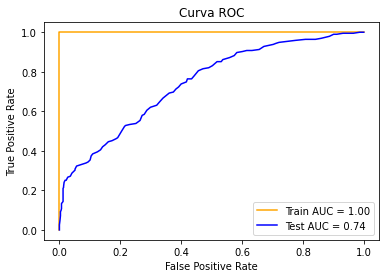

Parcelas con acierto:  29 de 39   74.36%
Exito min:  0.31783963143660066 
Exito max:  0.94 
Exito promedio:  0.6153473096753397
Exito * accuracy =  0.4607215754492287
Exito * accuracy / (Exito + accuracy) =  0.3377562566118762
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       585
           1       0.60      0.56      0.58       195

    accuracy                           0.80       780
   macro avg       0.73      0.72      0.72       780
weighted avg       0.79      0.80      0.79       780



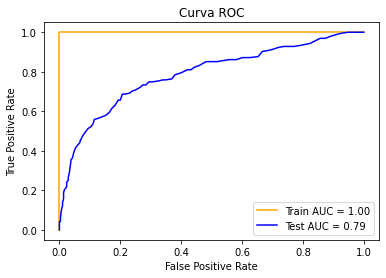

Parcelas con acierto:  36 de 39   92.31%
Exito min:  0.20309774775865366 
Exito max:  0.92 
Exito promedio:  0.623662505811747
Exito * accuracy =  0.4965313027039678
Exito * accuracy / (Exito + accuracy) =  0.3497151600040175
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       585
           1       0.45      0.40      0.42       195

    accuracy                           0.73       780
   macro avg       0.63      0.62      0.62       780
weighted avg       0.72      0.73      0.72       780



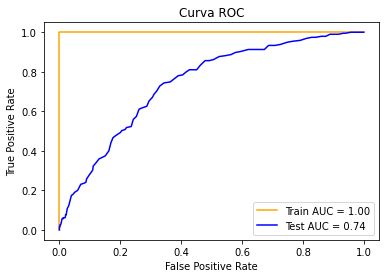

Parcelas con acierto:  27 de 39   69.23%
Exito min:  0.3100221240365854 
Exito max:  0.97 
Exito promedio:  0.5864097317043243
Exito * accuracy =  0.4270265738564823
Exito * accuracy / (Exito + accuracy) =  0.32483017412863785
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       585
           1       0.46      0.39      0.43       195

    accuracy                           0.73       780
   macro avg       0.63      0.62      0.63       780
weighted avg       0.72      0.73      0.73       780



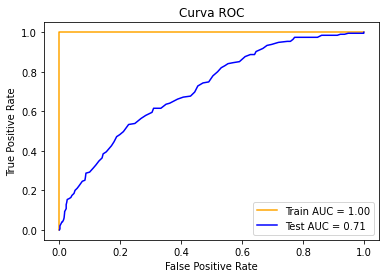

Parcelas con acierto:  30 de 39   76.92%
Exito min:  0.3046466216379805 
Exito max:  0.93 
Exito promedio:  0.5905399130088418
Exito * accuracy =  0.4330626028731506
Exito * accuracy / (Exito + accuracy) =  0.32711787481897575
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       570
           1       0.54      0.58      0.56       190

    accuracy                           0.77       760
   macro avg       0.70      0.71      0.70       760
weighted avg       0.78      0.77      0.77       760



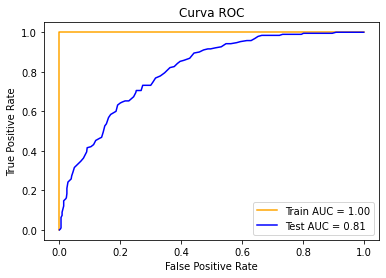

Parcelas con acierto:  34 de 38   89.47%
Exito min:  0.43327519521846114 
Exito max:  0.92 
Exito promedio:  0.6974715807928017
Exito * accuracy =  0.5368695720576171
Exito * accuracy / (Exito + accuracy) =  0.3659122750925731
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       570
           1       0.64      0.53      0.58       190

    accuracy                           0.81       760
   macro avg       0.75      0.71      0.73       760
weighted avg       0.80      0.81      0.80       760



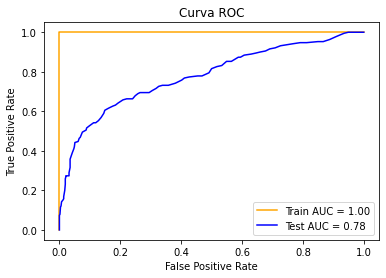

Parcelas con acierto:  28 de 38   73.68%
Exito min:  0.2933722847734389 
Exito max:  0.97 
Exito promedio:  0.625669851799592
Exito * accuracy =  0.5054753802696703
Exito * accuracy / (Exito + accuracy) =  0.3526003531857664
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       570
           1       0.50      0.42      0.46       190

    accuracy                           0.75       760
   macro avg       0.66      0.64      0.65       760
weighted avg       0.74      0.75      0.74       760



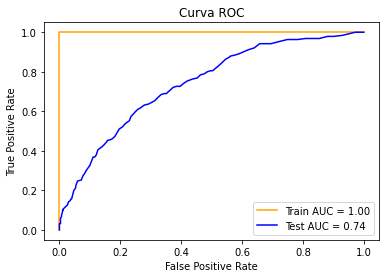

Parcelas con acierto:  26 de 38   68.42%
Exito min:  0.2911067717874036 
Exito max:  0.87 
Exito promedio:  0.5477435796489585
Exito * accuracy =  0.41080768473671886
Exito * accuracy / (Exito + accuracy) =  0.31655535899306314
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       570
           1       0.57      0.52      0.54       190

    accuracy                           0.78       760
   macro avg       0.71      0.69      0.70       760
weighted avg       0.78      0.78      0.78       760



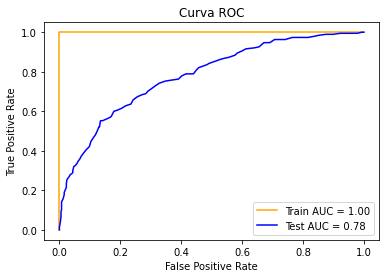

Parcelas con acierto:  30 de 38   78.95%
Exito min:  0.25 
Exito max:  0.97 
Exito promedio:  0.6522084191846504
Exito * accuracy =  0.509752369731161
Exito * accuracy / (Exito + accuracy) =  0.3555285683376068
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       570
           1       0.45      0.37      0.41       190

    accuracy                           0.73       760
   macro avg       0.63      0.61      0.62       760
weighted avg       0.72      0.73      0.72       760



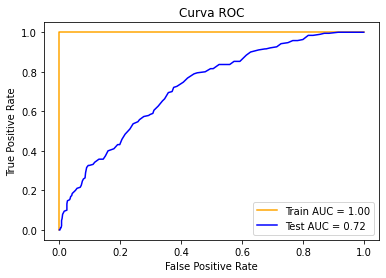

Parcelas con acierto:  25 de 38   65.79%
Exito min:  0.185 
Exito max:  0.88 
Exito promedio:  0.5851281323981357
Exito * accuracy =  0.4272975177381122
Exito * accuracy / (Exito + accuracy) =  0.32484441769640593
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       570
           1       0.52      0.43      0.47       190

    accuracy                           0.76       760
   macro avg       0.67      0.65      0.66       760
weighted avg       0.74      0.76      0.75       760



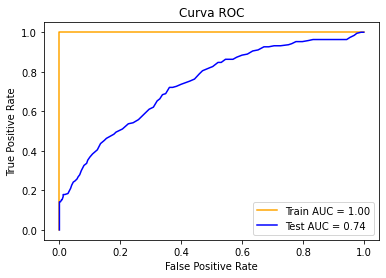

Parcelas con acierto:  28 de 38   73.68%
Exito min:  0.3047675117647789 
Exito max:  0.95 
Exito promedio:  0.5945021246145842
Exito * accuracy =  0.45057003128684275
Exito * accuracy / (Exito + accuracy) =  0.3331640616213248


In [23]:
entrenarUndersamplingNormalizacion(df=df, 
                                   normalizacion=[-1,1], 
                                   algoritmo=RandomForestClassifier, 
                                   random_state=33, 
                                   umbral=0.6, 
                                   n_splits=10
                                  )

- Con normalizacion entre 0 y 1 y umbral de 0.6:
  - Hay 1 modelo con 0.81 de accuracy que acierta 29/38 (76%) y tiene un exito de 0.6168078792559031. (Nada del otro mundo)
  - El maximo de parcelas ha sido 35/39 (89%) con un exito de 0.6318525876606552 y un accuracy de 0.8
  - El mayor exito ha sido 0.6926003744353055 en una prueba con 0.77 de accuracy y 34/38 (89%) parcelas acertadas.
- Con normalizacion entre -1 y 1 y umbral de 0.6:
  - hay un modelo que supera el 0.8 de accuracy (0.81) el cual acierta 28/38 (73%) parcelas y tiene un exito de 0.625669851799592. (malillo)
  - El maximo de parcelas ha sido 36/39 (92%) con un exito de 0.623662505811747 y un accuracy de 0.8 (exito regular)
  - El mayor exito ha sido 0.6974715807928017 en una parcela que ha acertado 34/38 (89%), con un accuracy de 0.77. (regular)

Se parecen mucho los resultados cambiando las normalizaciones.

Misma prueba pero con RandomForestRegressor --se supone q el algoritmo es igual pero obteniendo probabilidad (regresion) en vez de la clase final (clasificacion) --:

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       585
           1       0.58      0.45      0.50       195

    accuracy                           0.78       780
   macro avg       0.70      0.67      0.68       780
weighted avg       0.77      0.78      0.77       780



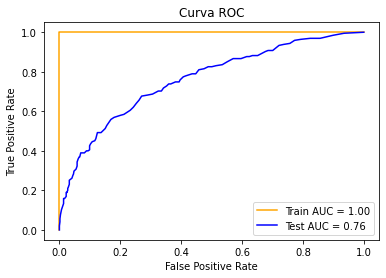

Parcelas con acierto:  33 de 39   84.62%
Exito min:  0.2249527423011391 
Exito max:  0.95 
Exito promedio:  0.6558825792731282
Exito * accuracy =  0.5120929368940194
Exito * accuracy / (Exito + accuracy) =  0.35644888574561473
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       585
           1       0.62      0.61      0.62       195

    accuracy                           0.81       780
   macro avg       0.75      0.74      0.75       780
weighted avg       0.81      0.81      0.81       780



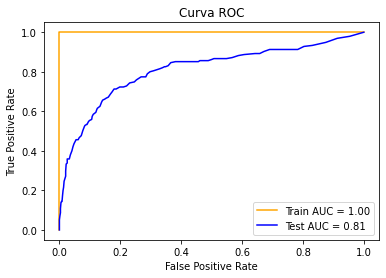

Parcelas con acierto:  36 de 39   92.31%
Exito min:  0.2527467530192982 
Exito max:  0.95 
Exito promedio:  0.6844756235950472
Exito * accuracy =  0.5546007616821408
Exito * accuracy / (Exito + accuracy) =  0.3710369143913427
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       585
           1       0.51      0.45      0.48       195

    accuracy                           0.76       780
   macro avg       0.67      0.65      0.66       780
weighted avg       0.75      0.76      0.75       780



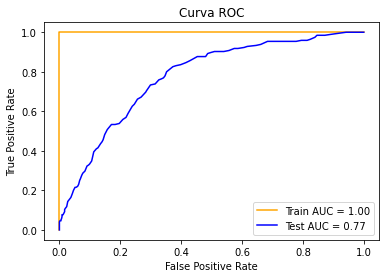

Parcelas con acierto:  31 de 39   79.49%
Exito min:  0.2574760013185201 
Exito max:  0.98 
Exito promedio:  0.6086917696445775
Exito * accuracy =  0.4604206975516676
Exito * accuracy / (Exito + accuracy) =  0.33727933060233645
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       585
           1       0.46      0.42      0.44       195

    accuracy                           0.73       780
   macro avg       0.64      0.63      0.63       780
weighted avg       0.72      0.73      0.73       780



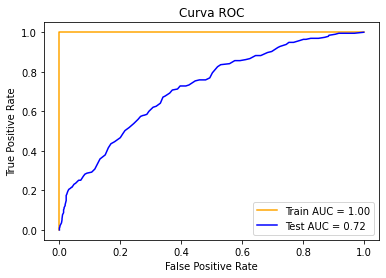

Parcelas con acierto:  32 de 39   82.05%
Exito min:  0.34526617118971126 
Exito max:  1.0 
Exito promedio:  0.6237521715320461
Exito * accuracy =  0.4574182591235004
Exito * accuracy / (Exito + accuracy) =  0.33705927701945027
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       570
           1       0.52      0.58      0.55       190

    accuracy                           0.76       760
   macro avg       0.69      0.70      0.69       760
weighted avg       0.77      0.76      0.77       760



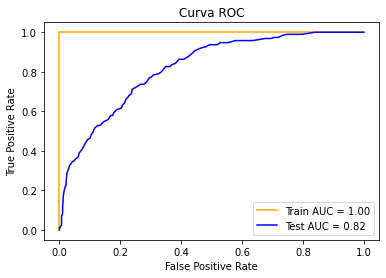

Parcelas con acierto:  34 de 38   89.47%
Exito min:  0.4494213724188851 
Exito max:  1.0 
Exito promedio:  0.707696626480569
Exito * accuracy =  0.5400842675772763
Exito * accuracy / (Exito + accuracy) =  0.3671908130861604
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       570
           1       0.63      0.57      0.60       190

    accuracy                           0.81       760
   macro avg       0.75      0.73      0.74       760
weighted avg       0.80      0.81      0.81       760



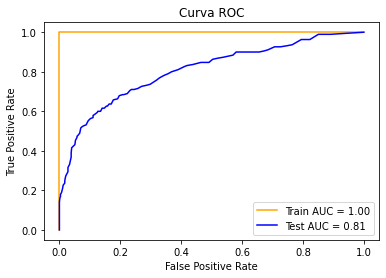

Parcelas con acierto:  29 de 38   76.32%
Exito min:  0.31219013444752886 
Exito max:  0.99 
Exito promedio:  0.6721268249094711
Exito * accuracy =  0.5438921017359536
Exito * accuracy / (Exito + accuracy) =  0.36716288918664164
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       570
           1       0.54      0.49      0.51       190

    accuracy                           0.77       760
   macro avg       0.69      0.67      0.68       760
weighted avg       0.76      0.77      0.76       760



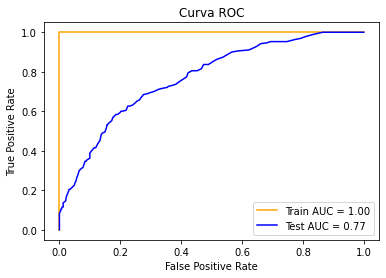

Parcelas con acierto:  27 de 38   71.05%
Exito min:  0.2911067717874036 
Exito max:  0.94 
Exito promedio:  0.6062424550252611
Exito * accuracy =  0.4650517779996411
Exito * accuracy / (Exito + accuracy) =  0.3386263885266234
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       570
           1       0.56      0.53      0.54       190

    accuracy                           0.78       760
   macro avg       0.70      0.69      0.70       760
weighted avg       0.77      0.78      0.78       760



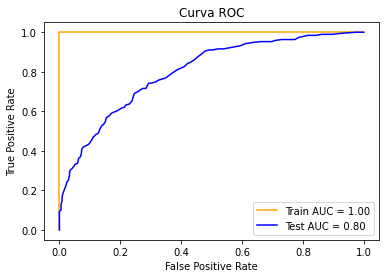

Parcelas con acierto:  30 de 38   78.95%
Exito min:  0.25 
Exito max:  0.99 
Exito promedio:  0.6702576747358082
Exito * accuracy =  0.5212135339063982
Exito * accuracy / (Exito + accuracy) =  0.3599816302113731
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       570
           1       0.50      0.47      0.49       190

    accuracy                           0.75       760
   macro avg       0.67      0.66      0.66       760
weighted avg       0.75      0.75      0.75       760



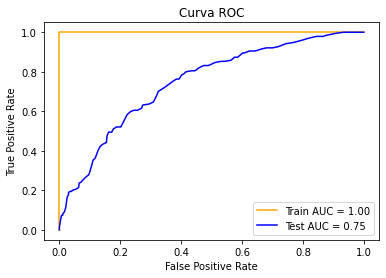

Parcelas con acierto:  29 de 38   76.32%
Exito min:  0.24132268312778937 
Exito max:  0.97 
Exito promedio:  0.6304588958727414
Exito * accuracy =  0.47367372308333594
Exito * accuracy / (Exito + accuracy) =  0.3428009849265555
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       570
           1       0.58      0.51      0.54       190

    accuracy                           0.78       760
   macro avg       0.71      0.69      0.70       760
weighted avg       0.78      0.78      0.78       760



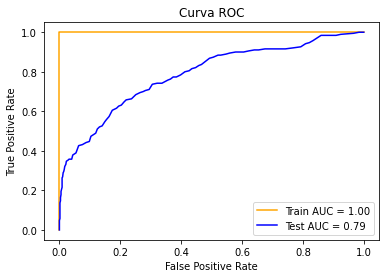

Parcelas con acierto:  29 de 38   76.32%
Exito min:  0.3366709859136379 
Exito max:  0.92 
Exito promedio:  0.6323293830603717
Exito * accuracy =  0.4958793582947125
Exito * accuracy / (Exito + accuracy) =  0.350063810424583


In [24]:
entrenarUndersamplingNormalizacion(df=df, 
                                   normalizacion=[-1,1], 
                                   algoritmo=RandomForestRegressor, 
                                   random_state=33, 
                                   umbral=0.6, 
                                   n_splits=10
                                  )

- Con normalizacion entre 0 y 1 y umbral de 0.6:
  - El maximo accuracy obtenido es de 0.81 en dos pruebas, una tiene 36/39 (92%) de aciertos y un exito de 0.673390506243391; y el otro tiene 29/38 (76%) y un exito de 0.6840431242696655. Ambos tienen un AUC de test de 0.81 (es bueno) y un exito muy similar, pero uno acierta en 7 parcelas mas que la otra a pesar de la similitud de las demas metricas. Obviamente el primero es mejor por esta razon y ademas tiene buena pinta.
  - El maximo de parcelas ha sido 36/38 (92%) con un exito de 0.673390506243391 (el modelo anterior).
  - El mayor exito es de 0.7262006751076499 en un modelo con 35/38 (92%) de acierto, 0.79 accuracy y el mayor TestAUC visto hasta ahora, 0.83.
- Con normalizacion entre -1 y 1 y umbral de 0.6:
  - El maximo accuracy obtenido es de 0.81, el cual se ha obtenido en 2 modelos: uno con 29/38 (76%) y exito de 0.6721268249094711; el otro tiene 36/39 (92%) con exito de 0.6844756235950472. Ambos tienen un Test AUC de 0.81 pero uno acierta 7 parcelas mas que la otra. El segundo modelo tiene precision y recall de la clase 1 mayor a 0.6, lo cual es muy bueno.
  - El maximo de parcelas ha sido 36/39 (92%) con un exito de 0.6844756235950472 (la prueba anterior).
  - El mayor exito ha sido 0.707696626480569 en una prueba que acierta 34/38 (89%) y con un Test AUC de 0.82

El accuracy global ha sido igual en ambas pruebas, pero el de normalizacion [0,1] ha tenido mejores exitos

No voy a probar con SVC ni GradientBoostingClassifier ni AdaBoostClassifier ni MLPClassifier ya que no obtiene los mejores resultados 

Voy a buscar a partir de ahora modelos con:
 - +0.81 de accuracy
 - +0.6 de precision y recall para la clase 1
 - +0.83 de Test AUC
 - +0.73 de exito promedio
 
Ya que son los maximos que he encontrado hasta ahora

Pruebo con la version scikit-learn de XGBoost:

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       585
           1       0.52      0.53      0.52       195

    accuracy                           0.76       780
   macro avg       0.68      0.68      0.68       780
weighted avg       0.76      0.76      0.76       780



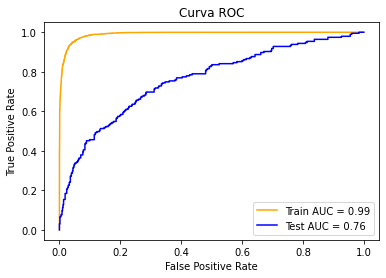

Parcelas con acierto:  33 de 39   84.62%
Exito min:  0.2406473193558576 
Exito max:  0.9788054 
Exito promedio:  0.6735276070409645
Exito * accuracy =  0.5111901838054499
Exito * accuracy / (Exito + accuracy) =  0.3568512964958693
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       585
           1       0.61      0.66      0.64       195

    accuracy                           0.81       780
   macro avg       0.75      0.76      0.75       780
weighted avg       0.82      0.81      0.81       780



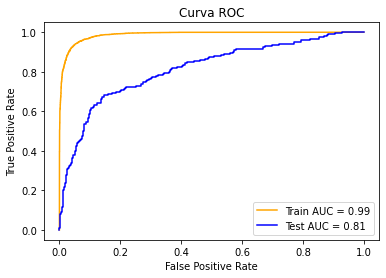

Parcelas con acierto:  36 de 39   92.31%
Exito min:  0.2607364863111967 
Exito max:  0.9623071 
Exito promedio:  0.698900240891654
Exito * accuracy =  0.5671844262620731
Exito * accuracy / (Exito + accuracy) =  0.3755097279681334
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       585
           1       0.57      0.50      0.53       195

    accuracy                           0.78       780
   macro avg       0.70      0.69      0.69       780
weighted avg       0.77      0.78      0.77       780



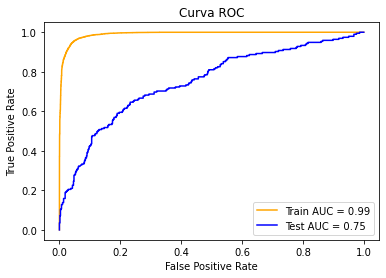

Parcelas con acierto:  33 de 39   84.62%
Exito min:  0.2341717631125059 
Exito max:  0.96263707 
Exito promedio:  0.6433276139099182
Exito * accuracy =  0.5014656272528594
Exito * accuracy / (Exito + accuracy) =  0.3524461718981466
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       585
           1       0.51      0.48      0.49       195

    accuracy                           0.75       780
   macro avg       0.67      0.66      0.66       780
weighted avg       0.75      0.75      0.75       780



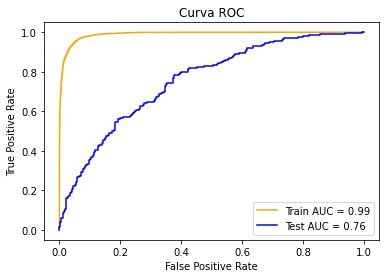

Parcelas con acierto:  34 de 39   87.18%
Exito min:  0.36791572686165286 
Exito max:  0.9841674 
Exito promedio:  0.6446536014666532
Exito * accuracy =  0.48514315905246846
Exito * accuracy / (Exito + accuracy) =  0.3472208787885423
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       570
           1       0.56      0.64      0.60       190

    accuracy                           0.78       760
   macro avg       0.72      0.74      0.73       760
weighted avg       0.80      0.78      0.79       760



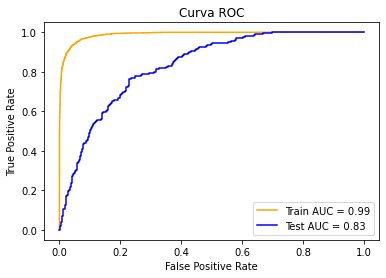

Parcelas con acierto:  36 de 38   94.74%
Exito min:  0.4388187460845637 
Exito max:  0.9928094 
Exito promedio:  0.7511482989894328
Exito * accuracy =  0.5890584028917131
Exito * accuracy / (Exito + accuracy) =  0.38366171684629546
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       570
           1       0.63      0.58      0.60       190

    accuracy                           0.81       760
   macro avg       0.75      0.73      0.74       760
weighted avg       0.81      0.81      0.81       760



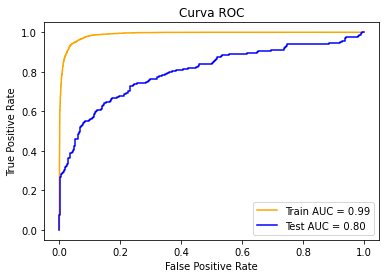

Parcelas con acierto:  32 de 38   84.21%
Exito min:  0.3478771690118901 
Exito max:  0.9793524 
Exito promedio:  0.7269131090695771
Exito * accuracy =  0.5882257395760393
Exito * accuracy / (Exito + accuracy) =  0.38292864325889464
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       570
           1       0.50      0.45      0.47       190

    accuracy                           0.75       760
   macro avg       0.66      0.65      0.65       760
weighted avg       0.74      0.75      0.74       760



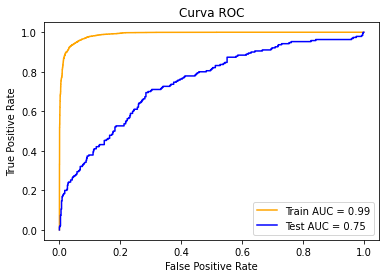

Parcelas con acierto:  28 de 38   73.68%
Exito min:  0.3128937786271645 
Exito max:  0.9441493 
Exito promedio:  0.6157710055347405
Exito * accuracy =  0.4610180291437729
Exito * accuracy / (Exito + accuracy) =  0.3378769956808486
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       570
           1       0.55      0.53      0.54       190

    accuracy                           0.77       760
   macro avg       0.70      0.69      0.69       760
weighted avg       0.77      0.77      0.77       760



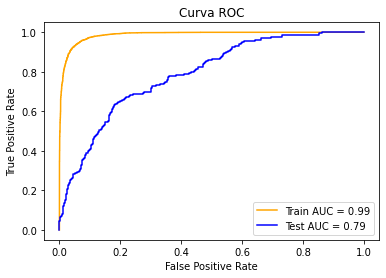

Parcelas con acierto:  32 de 38   84.21%
Exito min:  0.2226451963508385 
Exito max:  0.9505131 
Exito promedio:  0.6566828942732214
Exito * accuracy =  0.5072011301820802
Exito * accuracy / (Exito + accuracy) =  0.3549215656167169
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       570
           1       0.47      0.47      0.47       190

    accuracy                           0.74       760
   macro avg       0.65      0.65      0.65       760
weighted avg       0.74      0.74      0.74       760



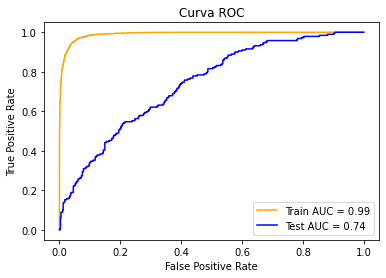

Parcelas con acierto:  33 de 38   86.84%
Exito min:  0.37355683248891774 
Exito max:  0.96729004 
Exito promedio:  0.6483822959935786
Exito * accuracy =  0.47690224139527687
Exito * accuracy / (Exito + accuracy) =  0.34460529932018247
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       570
           1       0.55      0.54      0.54       190

    accuracy                           0.77       760
   macro avg       0.70      0.70      0.70       760
weighted avg       0.77      0.77      0.77       760



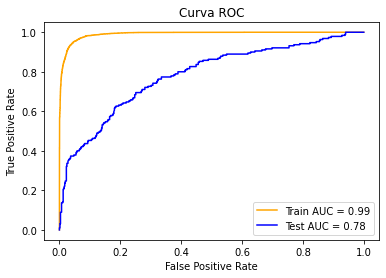

Parcelas con acierto:  30 de 38   78.95%
Exito min:  0.3188201416762648 
Exito max:  0.9667059 
Exito promedio:  0.6434785081756359
Exito * accuracy =  0.4978491615885183
Exito * accuracy / (Exito + accuracy) =  0.35129992838403384


In [27]:
entrenarUndersamplingNormalizacion(df=df, 
                                   normalizacion=[0,1], 
                                   algoritmo=XGBClassifier, 
                                   random_state=33, 
                                   umbral=0.6, 
                                   n_splits=10
                                  )


- Con normalizacion entre -1 y 1 y umbral de 0.6:
  - Hay un modelo con 0.81 de accuracy que tiene 0.64 de precision y 0.59 de recall para la clase 1. Ademas tiene un test AUC de 0.8, acierta 31/38 (81%) parcelas y tiene un exito de 0.6847677266924437
  - Hay un modelo con TestAUC  de 0.83 con accuracy de 0.78, acierta 34/38 (89%) de las parcelas y un exito de 0.730948428389112
- Con normalizacion entre 0 y 1 y umbral de 0.6:
  - Hay un modelo con 0.81 de accuracy que tiene 0.61 de precision y 0.66 de recall para la clase 1. Ademas tiene un test AUC de 0.81, acierta 36/39 (92%) parcelas y tiene un exito de 0.698900240891654. (Mejor que el de norm [-1,1]).
  - Hay un modelo con TestAUC de 0.83 con accuracy de 0.78, acierta 36/38 (94%) de las parcelas y un exito de 0.7511482989894328 (el mayor exito visto hasta ahora).

Pruebo con la version scikit-learn de LGBM:

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       585
           1       0.54      0.50      0.52       195

    accuracy                           0.77       780
   macro avg       0.69      0.68      0.68       780
weighted avg       0.76      0.77      0.77       780



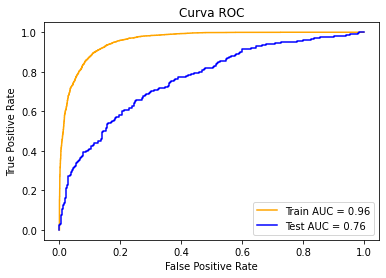

Parcelas con acierto:  33 de 39   84.62%
Exito min:  0.26499560556164625 
Exito max:  0.8805243048174727 
Exito promedio:  0.6144903652657966
Exito * accuracy =  0.4718970881977079
Exito * accuracy / (Exito + accuracy) =  0.34135109020531296
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       585
           1       0.62      0.59      0.61       195

    accuracy                           0.81       780
   macro avg       0.74      0.74      0.74       780
weighted avg       0.80      0.81      0.81       780



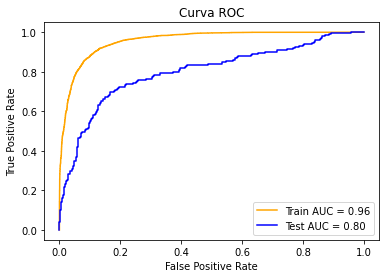

Parcelas con acierto:  34 de 39   87.18%
Exito min:  0.19520188127896465 
Exito max:  0.9275190474851082 
Exito promedio:  0.6396176693459059
Exito * accuracy =  0.5157942487417626
Exito * accuracy / (Exito + accuracy) =  0.35669729439840625
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       585
           1       0.53      0.51      0.52       195

    accuracy                           0.76       780
   macro avg       0.68      0.68      0.68       780
weighted avg       0.76      0.76      0.76       780



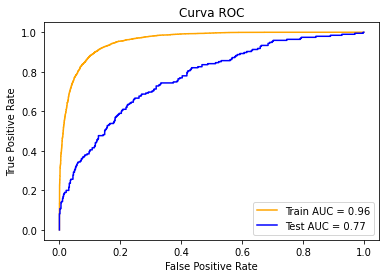

Parcelas con acierto:  32 de 39   82.05%
Exito min:  0.22777756359398066 
Exito max:  0.8992753131330846 
Exito promedio:  0.6040191629934493
Exito * accuracy =  0.46075820766807984
Exito * accuracy / (Exito + accuracy) =  0.3370974780884198
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       585
           1       0.49      0.47      0.48       195

    accuracy                           0.74       780
   macro avg       0.66      0.65      0.65       780
weighted avg       0.74      0.74      0.74       780



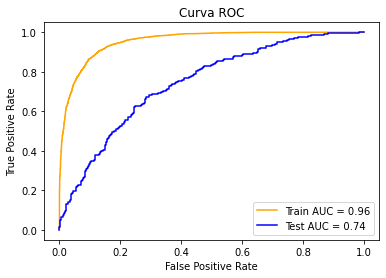

Parcelas con acierto:  33 de 39   84.62%
Exito min:  0.40151743704687887 
Exito max:  0.9338511414251425 
Exito promedio:  0.6040798092168996
Exito * accuracy =  0.44996201173720346
Exito * accuracy / (Exito + accuracy) =  0.33356423638428623
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       570
           1       0.57      0.63      0.60       190

    accuracy                           0.79       760
   macro avg       0.72      0.73      0.73       760
weighted avg       0.80      0.79      0.79       760



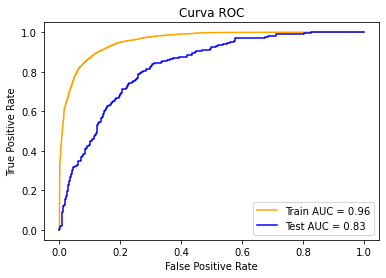

Parcelas con acierto:  35 de 38   92.11%
Exito min:  0.4057772168152827 
Exito max:  0.9580925397222794 
Exito promedio:  0.690197780292834
Exito * accuracy =  0.5439848294676415
Exito * accuracy / (Exito + accuracy) =  0.36796613876881945
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       570
           1       0.61      0.61      0.61       190

    accuracy                           0.81       760
   macro avg       0.74      0.74      0.74       760
weighted avg       0.81      0.81      0.81       760



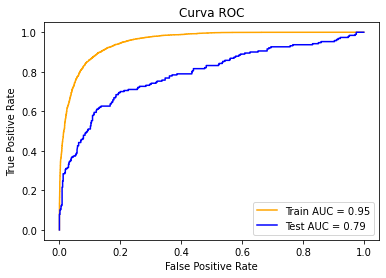

Parcelas con acierto:  31 de 38   81.58%
Exito min:  0.3536227977998863 
Exito max:  0.9259663543042436 
Exito promedio:  0.6594230976035123
Exito * accuracy =  0.5318767879354644
Exito * accuracy / (Exito + accuracy) =  0.3628076712168892
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       570
           1       0.51      0.47      0.49       190

    accuracy                           0.76       760
   macro avg       0.67      0.66      0.67       760
weighted avg       0.75      0.76      0.75       760



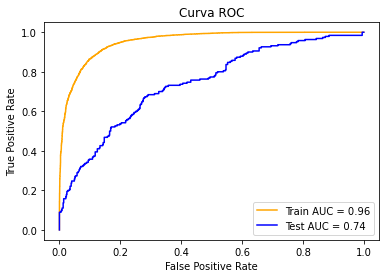

Parcelas con acierto:  26 de 38   68.42%
Exito min:  0.23077008147188577 
Exito max:  0.8864800398432332 
Exito promedio:  0.5843752663030153
Exito * accuracy =  0.442126023847676
Exito * accuracy / (Exito + accuracy) =  0.32971000750067875
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       570
           1       0.55      0.52      0.53       190

    accuracy                           0.78       760
   macro avg       0.70      0.69      0.69       760
weighted avg       0.77      0.78      0.77       760



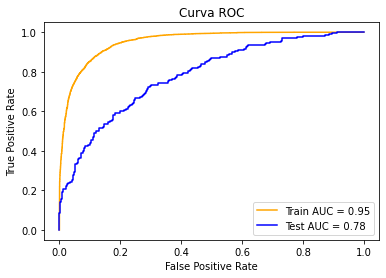

Parcelas con acierto:  28 de 38   73.68%
Exito min:  0.21990794479137318 
Exito max:  0.8813766402702561 
Exito promedio:  0.6295705946570864
Exito * accuracy =  0.487917210859242
Exito * accuracy / (Exito + accuracy) =  0.34737820421077714
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       570
           1       0.43      0.42      0.43       190

    accuracy                           0.72       760
   macro avg       0.62      0.62      0.62       760
weighted avg       0.72      0.72      0.72       760



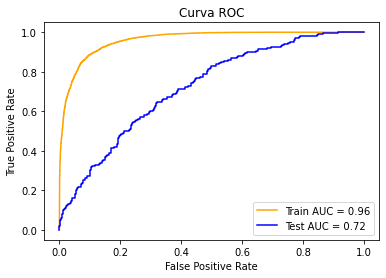

Parcelas con acierto:  31 de 38   81.58%
Exito min:  0.3862163792689034 
Exito max:  0.8926441780630447 
Exito promedio:  0.6094057638532383
Exito * accuracy =  0.4378099303471949
Exito * accuracy / (Exito + accuracy) =  0.32971915080478487
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       570
           1       0.59      0.55      0.57       190

    accuracy                           0.79       760
   macro avg       0.72      0.71      0.72       760
weighted avg       0.79      0.79      0.79       760



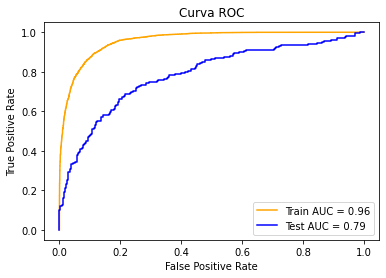

Parcelas con acierto:  31 de 38   81.58%
Exito min:  0.35802710982160313 
Exito max:  0.9197870730725468 
Exito promedio:  0.6272021567519804
Exito * accuracy =  0.49681012942722663
Exito * accuracy / (Exito + accuracy) =  0.35003701274159027


In [48]:
entrenarUndersamplingNormalizacion(df=df, 
                                   normalizacion=[0,1], 
                                   algoritmo=LGBMClassifier, 
                                   random_state=33, 
                                   umbral=0.6, 
                                   n_splits=10
                                  )

- Con normalizacion entre -1 y 1 y umbral de 0.6:
  - Hay un modelo con TestAUC de 0.83 que tiene accuracy de 0.79, que acierta 37/38 (97%) parcelas (el mejor hasta ahora), con un exito de 0.6878154580710379 y un f1-score de 0.62 para la clase 1 (la mejor hasta ahora). (Muy buen modelo).
  - Hay un modelo con 0.61 de precision y de recall para la clase 1, con accuracy de 0.8, testAUC de 0.79, acierta 31/38 (81%) parcelas y tiene un exito de 0.6619460176879981
- Con normalizacion entre 0 y 1 y umbral de 0.6:
  - Hay un modelo con 0.61 de precision y de recall para la clase 1, con accuracy de 0.81, testAUC de 0.79, acierta 31/38 (81%) parcelas y tiene un exito de 0.6594230976035123

Voy a buscar a partir de ahora modelos con:
 - +0.82 de accuracy
 - +0.61 de precision y recall para la clase 1
 - +0.62 de f1-score para la clase 1
 - +0.83 de Test AUC
 - +0.75 de exito promedio
 
Ya que son los maximos que he encontrado hasta ahora

Ahora voy a probar con XGBoost y con LGBM con sus propias librerias:

Al entrenar un modelo de XGBoost, hay una variedad de parámetros que se pueden ajustar para mejorar el rendimiento del modelo. Aquí hay una breve explicación de algunos de los parámetros más comunes que se pueden ajustar:

- `max_depth`: La profundidad máxima del árbol de decisión. Se utiliza para controlar la complejidad del modelo. Un valor más alto puede llevar a un sobreajuste, mientras que un valor más bajo puede llevar a un subajuste.

- `learning_rate`: Controla la tasa de aprendizaje del modelo. Un valor más alto puede hacer que el modelo converja más rápido, pero también puede hacer que el modelo sea más sensible a los valores atípicos y al sobreajuste.

- `n_estimators`: El número de árboles que se utilizan en el modelo. Un valor más alto puede llevar a un mejor rendimiento, pero también puede aumentar el tiempo de entrenamiento.

- `subsample`: La fracción de las observaciones de entrenamiento que se utilizan para ajustar cada árbol. Un valor más bajo puede reducir el sobreajuste, pero también puede reducir el rendimiento.

- `colsample_bytree`: La fracción de las características que se utilizan para ajustar cada árbol. Un valor más bajo puede reducir el sobreajuste, pero también puede reducir el rendimiento.

- `gamma`: El valor mínimo que debe reducir la función de costo para que se cree un nuevo nodo en el árbol. Un valor más alto puede reducir el sobreajuste, pero también puede reducir el rendimiento.

- `alpha`: El parámetro de regularización L1. Un valor más alto puede reducir el sobreajuste, pero también puede reducir el rendimiento.

- `lambda`: El parámetro de regularización L2. Un valor más alto puede reducir el sobreajuste, pero también puede reducir el rendimiento.

- `objective`: La función de pérdida que se utiliza para ajustar el modelo. Esto se puede configurar en función del tipo de problema que se esté resolviendo (por ejemplo, clasificación binaria, clasificación multiclase o regresión).

Estos son solo algunos de los parámetros que se pueden ajustar en XGBoost. La elección de los parámetros óptimos dependerá del conjunto de datos y del problema que se esté resolviendo. Por lo general, se utiliza un enfoque de búsqueda de hiperparámetros para encontrar los valores óptimos de los parámetros del modelo.


El parámetro `objective` en XGBoost y LightGBM se utiliza para especificar el tipo de problema que se está abordando y, por lo tanto, la función de pérdida que se debe optimizar. Algunos de los valores que se pueden utilizar en este parámetro son:

- Para regresión: `reg:squarederror`, `reg:squaredlogerror`, `reg:pseudohubererror`, `reg:gamma`, `reg:tweedie`.
- Para clasificación binaria: `binary:logistic`, `binary:logitraw`, `binary:hinge`.
- Para clasificación multiclase: `multi:softmax`, `multi:softprob`.
- Para ranking: `rank:pairwise`, `rank:ndcg`, `rank:map`.
- Para personalizar la función de pérdida: `custom`.

Cada uno de estos valores determina cómo se calcula la pérdida y cómo se entrena el modelo para optimizar esta pérdida. Por lo tanto, es importante elegir el valor correcto de `objective` en función del tipo de problema que se está abordando.


El parámetro `eval_metric` en XGBoost y LightGBM se utiliza para especificar la métrica que se utilizará para evaluar la calidad de la predicción en el conjunto de validación o prueba. Algunos de los valores que se pueden utilizar en este parámetro son:

- Para regresión: `rmse`, `mae`, `logloss`.
- Para clasificación binaria: `error`, `auc`, `logloss`, `aucpr`.
- Para clasificación multiclase: `merror`, `mlogloss`.
- Para ranking: `ndcg`, `map`.
- Para personalizar la métrica: `custom`.

Cada una de estas métricas se utiliza para evaluar la calidad de la predicción en función del tipo de problema que se está abordando. Por lo tanto, es importante elegir la métrica adecuada en función de los objetivos del proyecto y del tipo de problema que se está abordando.


Voy a probar con los parametros que ha usado Mario:

objective: binary:logistic
use_label_encoder: None
base_score: 0.5
booster: gbtree
callbacks: None
colsample_bylevel: 1
colsample_bynode: 1
colsample_bytree: 0.9657249704671855
early_stopping_rounds: None
enable_categorical: False
eval_metric: auc
feature_types: None
gamma: 0
gpu_id: 0
grow_policy: depthwise
importance_type: None
interaction_constraints: 
learning_rate: 0.092
max_bin: 256
max_cat_threshold: 64
max_cat_to_onehot: 4
max_delta_step: 0
max_depth: 141
max_leaves: 0
min_child_weight: 2.8915804320720007
missing: nan
monotone_constraints: ()
n_estimators: 145
n_jobs: 0
num_parallel_tree: 1
predictor: gpu_predictor
random_state: 2027
reg_alpha: 0
reg_lambda: 2.4958860070369515
sampling_method: uniform
scale_pos_weight: 5.6052968104215815
subsample: 1
tree_method: gpu_hist
validate_parameters: 1
verbosity: 0
min_child_samples: 14
subsample_for_bin: 5
max_leaf_nodes: 27
eta: 0.037211579035864056
seed: 2027
              precision    recall  f1-score   support

           0       

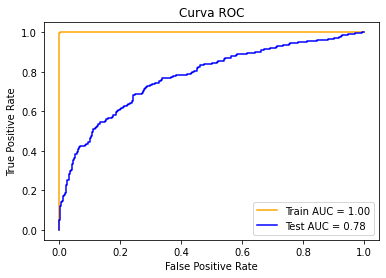

Parcelas con acierto:  36 de 39   92.31%
Exito min:  0.17333736662950175 
Exito max:  0.99503714 
Exito promedio:  0.8147284406151569
Exito * accuracy =  0.5985120467595961
Exito * accuracy / (Exito + accuracy) =  0.38630034019113724
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       585
           1       0.52      0.75      0.62       195

    accuracy                           0.77       780
   macro avg       0.71      0.76      0.72       780
weighted avg       0.81      0.77      0.78       780



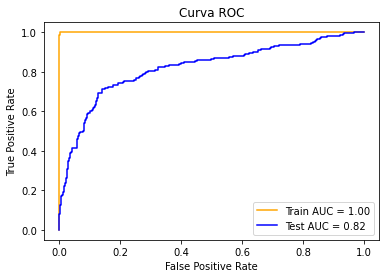

Parcelas con acierto:  36 de 39   92.31%
Exito min:  0.2457748140056521 
Exito max:  0.99473333 
Exito promedio:  0.8150721121899533
Exito * accuracy =  0.6248886193456309
Exito * accuracy / (Exito + accuracy) =  0.3950643606255513
              precision    recall  f1-score   support

           0       0.88      0.74      0.80       585
           1       0.46      0.69      0.55       195

    accuracy                           0.72       780
   macro avg       0.67      0.71      0.68       780
weighted avg       0.77      0.72      0.74       780



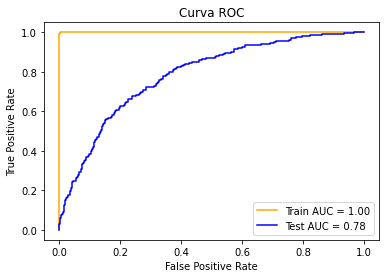

Parcelas con acierto:  36 de 39   92.31%
Exito min:  0.209558158048327 
Exito max:  0.99297744 
Exito promedio:  0.783432560575621
Exito * accuracy =  0.5664820053392952
Exito * accuracy / (Exito + accuracy) =  0.3760228604508052
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       585
           1       0.45      0.71      0.55       195

    accuracy                           0.71       780
   macro avg       0.67      0.71      0.67       780
weighted avg       0.77      0.71      0.73       780



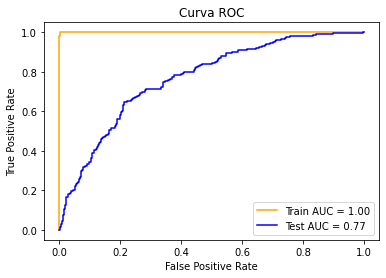

Parcelas con acierto:  38 de 39   97.44%
Exito min:  0.4945277403545204 
Exito max:  0.99567527 
Exito promedio:  0.8019088598340343
Exito * accuracy =  0.5726451729840476
Exito * accuracy / (Exito + accuracy) =  0.37773143654621716
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       570
           1       0.49      0.79      0.60       190

    accuracy                           0.74       760
   macro avg       0.70      0.76      0.70       760
weighted avg       0.81      0.74      0.75       760



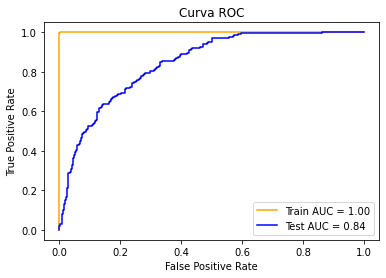

Parcelas con acierto:  37 de 38   97.37%
Exito min:  0.6133173476360895 
Exito max:  0.9920838 
Exito promedio:  0.8768063402469546
Exito * accuracy =  0.6472215222086073
Exito * accuracy / (Exito + accuracy) =  0.40076523565557537
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       570
           1       0.54      0.74      0.62       190

    accuracy                           0.78       760
   macro avg       0.72      0.76      0.73       760
weighted avg       0.81      0.78      0.79       760



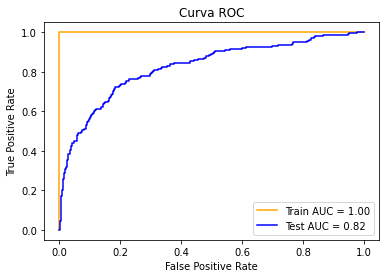

Parcelas con acierto:  33 de 38   86.84%
Exito min:  0.42886093011000104 
Exito max:  0.9954117 
Exito promedio:  0.8342869485660505
Exito * accuracy =  0.6476701311236444
Exito * accuracy / (Exito + accuracy) =  0.4021290389161538
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       570
           1       0.47      0.67      0.56       190

    accuracy                           0.73       760
   macro avg       0.67      0.71      0.68       760
weighted avg       0.77      0.73      0.74       760



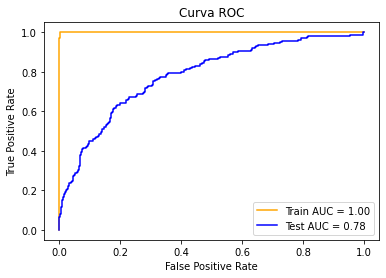

Parcelas con acierto:  32 de 38   84.21%
Exito min:  0.3762194514274597 
Exito max:  0.991695 
Exito promedio:  0.7583151090043287
Exito * accuracy =  0.5547673692189563
Exito * accuracy / (Exito + accuracy) =  0.3723535689306499
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       570
           1       0.51      0.70      0.59       190

    accuracy                           0.76       760
   macro avg       0.70      0.74      0.71       760
weighted avg       0.79      0.76      0.77       760



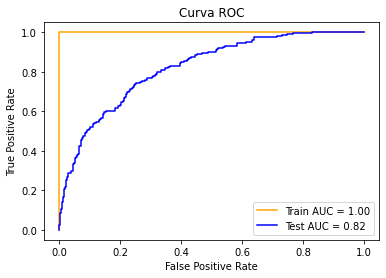

Parcelas con acierto:  35 de 38   92.11%
Exito min:  0.2516769984177547 
Exito max:  0.9922786 
Exito promedio:  0.8318151853194453
Exito * accuracy =  0.631522844643842
Exito * accuracy / (Exito + accuracy) =  0.39692812003319
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       570
           1       0.44      0.69      0.54       190

    accuracy                           0.70       760
   macro avg       0.66      0.70      0.66       760
weighted avg       0.77      0.70      0.72       760



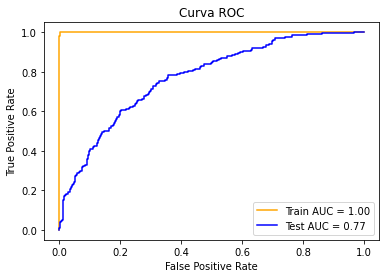

Parcelas con acierto:  35 de 38   92.11%
Exito min:  0.43120044298361715 
Exito max:  0.9930381 
Exito promedio:  0.7881968539170369
Exito * accuracy =  0.554849101112651
Exito * accuracy / (Exito + accuracy) =  0.3718468314297661
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       570
           1       0.48      0.72      0.57       190

    accuracy                           0.73       760
   macro avg       0.68      0.73      0.69       760
weighted avg       0.78      0.73      0.75       760



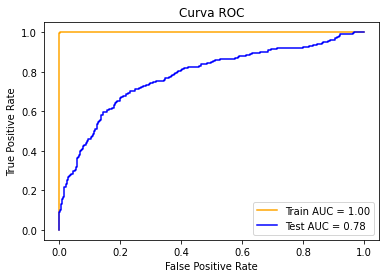

Parcelas con acierto:  35 de 38   92.11%
Exito min:  0.4246346998059576 
Exito max:  0.99322176 
Exito promedio:  0.7808329483685229
Exito * accuracy =  0.5722683582121938
Exito * accuracy / (Exito + accuracy) =  0.37805238273921465


In [29]:
import xgboost as xgb
import joblib

# Cargar el modelo
xgb_model = joblib.load('bestmodels/Xgbm_model_481')

# Obtener los parámetros del modelo
params = xgb_model.get_params()

# Imprimir los nombres de los parámetros y sus valores
for key, value in params.items():
    print(f"{key}: {value}")
    
entrenarUndersamplingNormalizacion(df=df, 
                                   normalizacion=[0,1], 
                                   params=params, 
                                   random_state=33, 
                                   umbral=0.6, 
                                   n_splits=10,
                                   XGBoost = True,
                                  )    

- Con normalizacion entre -1 y 1 y umbral de 0.6:
  - Hay un modelo con 0.62 de f1-score para la clase 1 con un recall de 0.76. TestAUC = 0.82, acierta 36/39 (92%) parcelas. Exito promedio de 0.8 (el mas alto hasta ahora). Esto se debe a que tiende a poner muchos 1, por lo cual no es tan equilibrado como otros modelos.
- Con normalizacion entre 0 y 1 y umbral de 0.6:
  - Hay un modelo con TestAUC de 0.84 con accuracy de 0.74, acierta 37/38 (97%) parcelas y tiene un exito de 0.8768063402469546. Ademas tiene una precision y recall para la clase 1 de 0.49 y 0.79 respectivamente. (Buen modelo pero habria que verlo).

En XGBoost, Mario ha logrado obtener un accuracy de 0.98 con estos parametros pero yo lo maximo que he conseguido es 0.78, asi que deberia probar con distintas columnas de informacion.

boosting_type: gbdt
class_weight: None
colsample_bytree: 1.0
importance_type: split
learning_rate: 0.11533354417560811
max_depth: 99
min_child_samples: 73
min_child_weight: 0.001
min_split_gain: 0.0
n_estimators: 426
n_jobs: -1
num_leaves: 44
objective: None
random_state: 2027
reg_alpha: 0.0
reg_lambda: 0.0
silent: True
subsample: 1.0
subsample_for_bin: 200000
subsample_freq: 0
lambda_l1: 0.005362644132692479
lambda_l2: 0.09014662034945402
feature_fraction: 0.9237744994047856
bagging_fraction: 0.9285725886092697
bagging_freq: 2
min_data_in_leaf: 2
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] feature_fraction is set=0.9237744994047856, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9237744994047856
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=73 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_fraction is set=0.9285725886092697, subs

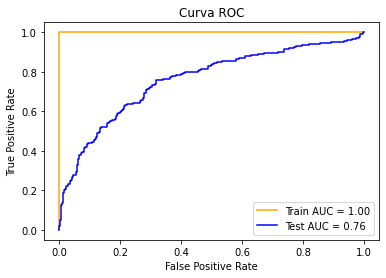

Parcelas con acierto:  31 de 39   79.49%
Exito min:  0.2753473289958619 
Exito max:  1.040690518264265 
Exito promedio:  0.6671133317140591
Exito * accuracy =  0.5200062893360871
Exito * accuracy / (Exito + accuracy) =  0.3594677903882949
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] feature_fraction is set=0.9237744994047856, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9237744994047856
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=73 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_fraction is set=0.9285725886092697, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9285725886092697
[LightGBM] [Warning] lambda_l1 is set=0.005362644132692479, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005362644132692479
[LightGBM] [Warning] lambda_l2 is set=0.09014662034945402, reg_lambda=0.0 will be ignored. Current v

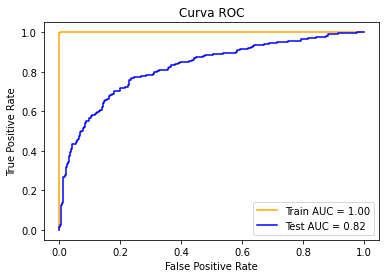

Parcelas con acierto:  36 de 39   92.31%
Exito min:  0.35800185097652687 
Exito max:  0.983119854732113 
Exito promedio:  0.7069226371047096
Exito * accuracy =  0.56735073183019
Exito * accuracy / (Exito + accuracy) =  0.3758567179958594
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] feature_fraction is set=0.9237744994047856, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9237744994047856
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=73 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_fraction is set=0.9285725886092697, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9285725886092697
[LightGBM] [Warning] lambda_l1 is set=0.005362644132692479, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005362644132692479
[LightGBM] [Warning] lambda_l2 is set=0.09014662034945402, reg_lambda=0.0 will be ignored. Current va

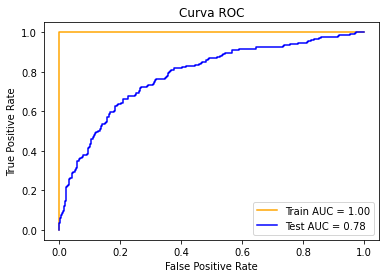

Parcelas con acierto:  29 de 39   74.36%
Exito min:  0.21652364967809945 
Exito max:  1.0931821833497966 
Exito promedio:  0.6515711747652982
Exito * accuracy =  0.510397420232817
Exito * accuracy / (Exito + accuracy) =  0.35570131486250345
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] feature_fraction is set=0.9237744994047856, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9237744994047856
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=73 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_fraction is set=0.9285725886092697, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9285725886092697
[LightGBM] [Warning] lambda_l1 is set=0.005362644132692479, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005362644132692479
[LightGBM] [Warning] lambda_l2 is set=0.09014662034945402, reg_lambda=0.0 will be ignored. Current

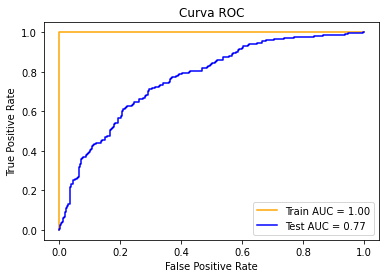

Parcelas con acierto:  32 de 39   82.05%
Exito min:  0.2770992601610645 
Exito max:  1.0160288809313076 
Exito promedio:  0.6569111433707805
Exito * accuracy =  0.5053162641313697
Exito * accuracy / (Exito + accuracy) =  0.35432396991234777
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] feature_fraction is set=0.9237744994047856, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9237744994047856
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=73 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_fraction is set=0.9285725886092697, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9285725886092697
[LightGBM] [Warning] lambda_l1 is set=0.005362644132692479, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005362644132692479
[LightGBM] [Warning] lambda_l2 is set=0.09014662034945402, reg_lambda=0.0 will be ignored. Current

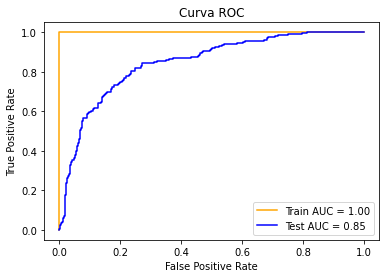

Parcelas con acierto:  37 de 38   97.37%
Exito min:  0.36096555533797675 
Exito max:  1.09033513117936 
Exito promedio:  0.7328395769990347
Exito * accuracy =  0.5949500250110584
Exito * accuracy / (Exito + accuracy) =  0.3851602772551505
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] feature_fraction is set=0.9237744994047856, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9237744994047856
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=73 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_fraction is set=0.9285725886092697, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9285725886092697
[LightGBM] [Warning] lambda_l1 is set=0.005362644132692479, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005362644132692479
[LightGBM] [Warning] lambda_l2 is set=0.09014662034945402, reg_lambda=0.0 will be ignored. Current v

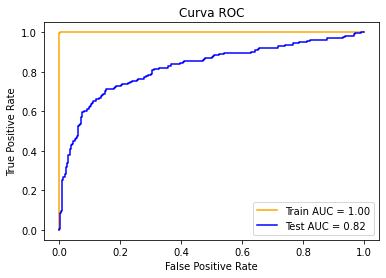

Parcelas con acierto:  32 de 38   84.21%
Exito min:  0.3645935816838203 
Exito max:  1.0666681341473876 
Exito promedio:  0.7326769617904432
Exito * accuracy =  0.6083146880128548
Exito * accuracy / (Exito + accuracy) =  0.3892117684811792
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] feature_fraction is set=0.9237744994047856, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9237744994047856
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=73 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_fraction is set=0.9285725886092697, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9285725886092697
[LightGBM] [Warning] lambda_l1 is set=0.005362644132692479, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005362644132692479
[LightGBM] [Warning] lambda_l2 is set=0.09014662034945402, reg_lambda=0.0 will be ignored. Current 

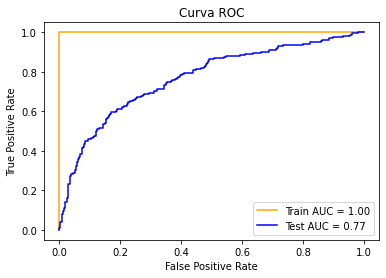

Parcelas con acierto:  27 de 38   71.05%
Exito min:  0.3442096997443937 
Exito max:  1.004481040673883 
Exito promedio:  0.6405363876352227
Exito * accuracy =  0.49810132249002187
Exito * accuracy / (Exito + accuracy) =  0.35122872200414595
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] feature_fraction is set=0.9237744994047856, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9237744994047856
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=73 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_fraction is set=0.9285725886092697, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9285725886092697
[LightGBM] [Warning] lambda_l1 is set=0.005362644132692479, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005362644132692479
[LightGBM] [Warning] lambda_l2 is set=0.09014662034945402, reg_lambda=0.0 will be ignored. Current

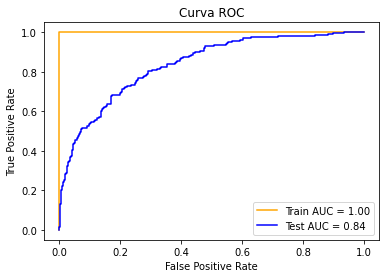

Parcelas con acierto:  32 de 38   84.21%
Exito min:  0.32540104378398327 
Exito max:  0.9689497549486493 
Exito promedio:  0.7048061389813447
Exito * accuracy =  0.5694091701770337
Exito * accuracy / (Exito + accuracy) =  0.3764188804789788
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] feature_fraction is set=0.9237744994047856, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9237744994047856
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=73 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_fraction is set=0.9285725886092697, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9285725886092697
[LightGBM] [Warning] lambda_l1 is set=0.005362644132692479, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005362644132692479
[LightGBM] [Warning] lambda_l2 is set=0.09014662034945402, reg_lambda=0.0 will be ignored. Current

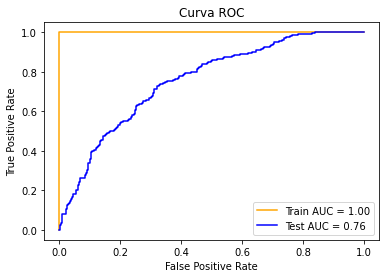

Parcelas con acierto:  34 de 38   89.47%
Exito min:  0.40634451036845204 
Exito max:  1.0229133110748179 
Exito promedio:  0.6706972636812252
Exito * accuracy =  0.4977279693634355
Exito * accuracy / (Exito + accuracy) =  0.3522983289653426
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] feature_fraction is set=0.9237744994047856, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9237744994047856
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=73 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_fraction is set=0.9285725886092697, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9285725886092697
[LightGBM] [Warning] lambda_l1 is set=0.005362644132692479, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005362644132692479
[LightGBM] [Warning] lambda_l2 is set=0.09014662034945402, reg_lambda=0.0 will be ignored. Current

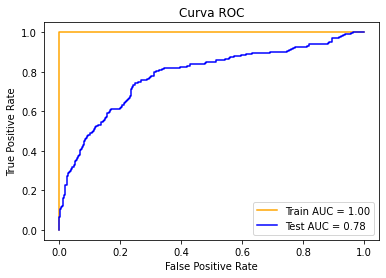

Parcelas con acierto:  30 de 38   78.95%
Exito min:  0.3897786709650598 
Exito max:  1.0084564130304812 
Exito promedio:  0.6601368755273643
Exito * accuracy =  0.5220292923578236
Exito * accuracy / (Exito + accuracy) =  0.35979034541725113


In [49]:
import lightgbm as lgb
import joblib

# Cargar el modelo
lgb_model = joblib.load('bestmodels/lgbm_model_152')

# Obtener los parámetros del modelo
params = lgb_model.get_params()

# Imprimir los nombres de los parámetros y sus valores
for key, value in params.items():
    print(f"{key}: {value}")
    
entrenarUndersamplingNormalizacion(df=df, 
                                   normalizacion=[-1,1], 
                                   params=params, 
                                   random_state=33, 
                                   umbral=0.6, 
                                   n_splits=10,
                                   LGBM = True,
                                  )    


- Con normalizacion entre -1 y 1 y umbral de 0.6:
  - Hay un modelo con 0.63 de f1-score para la clase 1 con un recall de 0.63 y una precision de 0.62. TestAUC = 0.85 (el mas alto hasta ahora), acierta 37/38 (97%) parcelas. Exito promedio de 0.7328395769990347. Tiene 0.81 de accuracy.
  - Hay un modelo con 0.83 de accuracy con 0.65 de f1-score en la clase 1 con precision de 0.67 y recall de 0.62 (muy bueno) y con f1-score de la clase 0 muy bueno tambien de 0.89. TestAUC de 0.82, acierta 32/38 (84%) parcelas y tiene un exito de 0.7326769617904432 
  - Estos 2 modelos son muy buenos
- Con normalizacion entre 0 y 1 y umbral de 0.6:
  - Hay un modelo con 0.83 de accuracy con 0.64 de f1-score en la clase 1 con precision de 0.68 y recall de 0.61 (muy bueno) y con f1-score de la clase 0 muy bueno tambien de 0.89. TestAUC de 0.83, acierta 33/38 (86%) parcelas y tiene un exito de 0.7198188783184968

En LGBM, Mario ha logrado obtener un accuracy de 0.88 con estos parametros pero yo lo maximo que he conseguido es 0.83, asi que deberia probar con distintas columnas de informacion.

Voy a crear otros notebooks para repetir estas pruebas pero para distintos datos como con la precipitacion acumulada de 3 dias, la presion, etc...

Conclusiones: Los mejores modelos han sido:
 - XGBoostClassifier, norm = [0, 1], threshold = 0.6:
 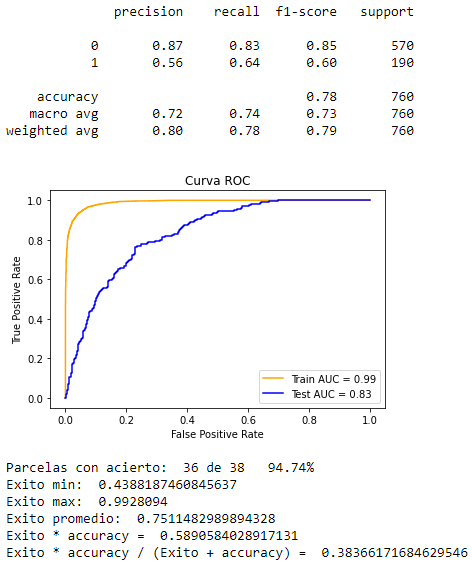
 - LGBMClassifier, norm = [-1, 1], threshold = 0.6:
 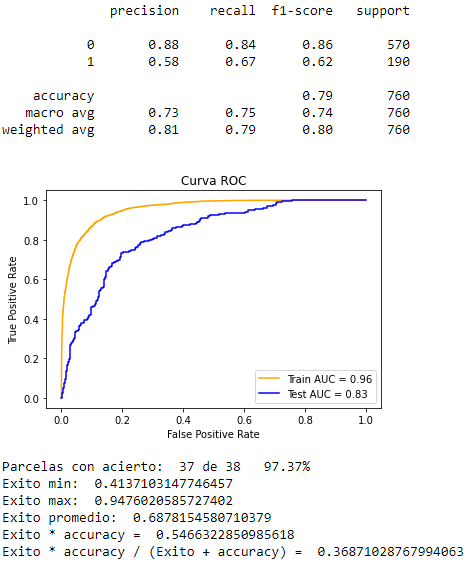
 - LGBMClassifier, norm = [-1, 1], threshold = 0.6 (otra vez):
 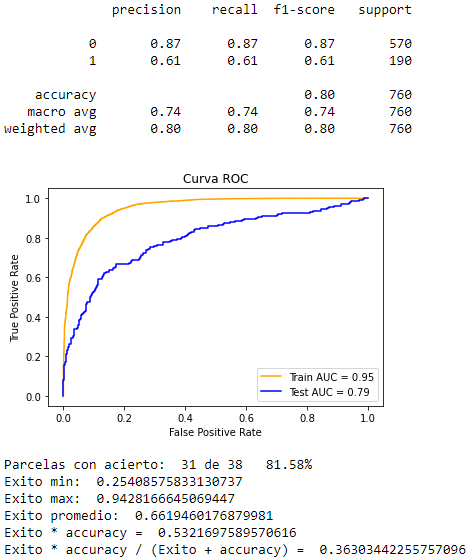
 - LGBMClassifier, norm = [0, 1], threshold = 0.6:
 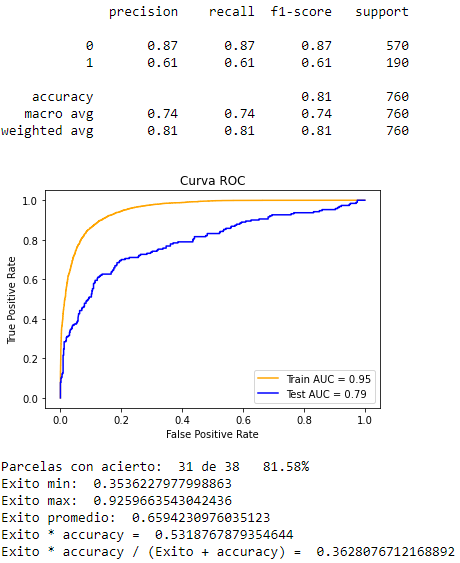
 - LGBMClassifier, norm = [0, 1], threshold = 0.6 (otra vez):
 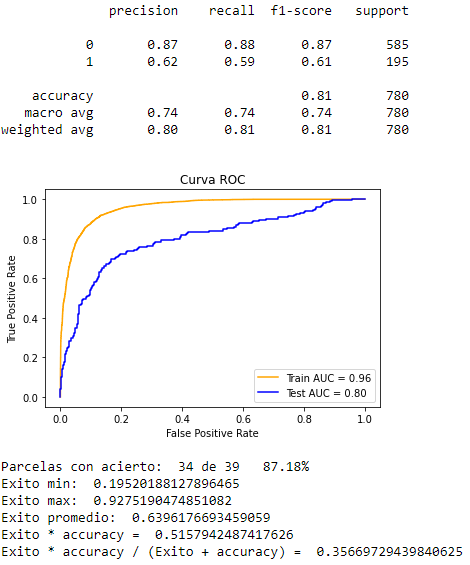
 - LGBM, norm = [-1, 1], threshold = 0.6 : 
 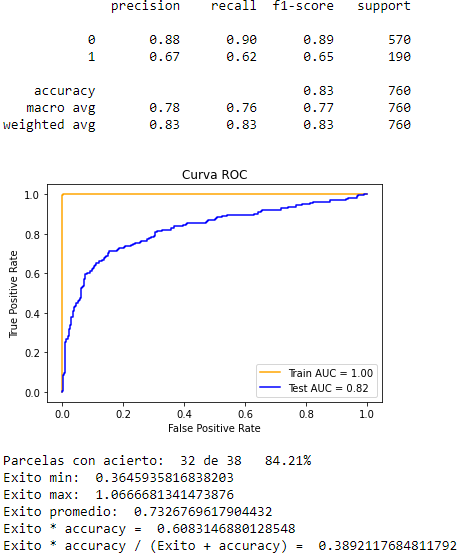
 - LGBM, norm = [-1, 1], threshold = 0.6 (otra vez): 
 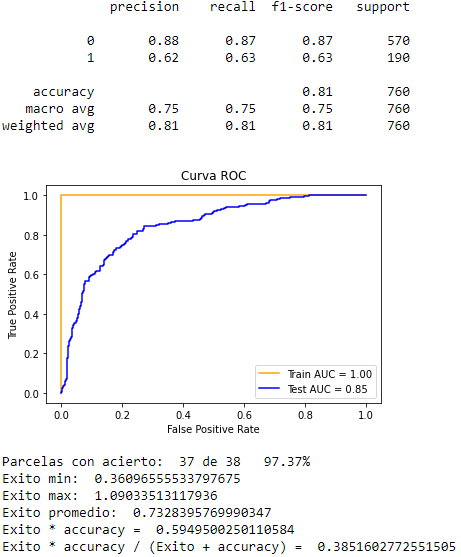
 - LGBM, norm = [0, 1], threshold = 0.6 : 
 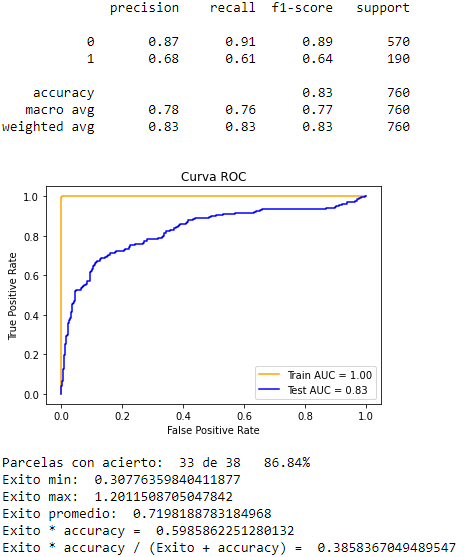
 